# ERCOT Energy Forecasting - RNN Project


Author

Jacinth Attada

Under the guidance of David Wanik, Assistant Professor in-Residence at University of Connecticut, this project was completed as part of an academic review for Deep Learning course.




#Introduction

The impact of weather on energy consumption and demand is evident. The privatization of energy companies around the world has led to need for robust methods to predict demand for energy. In simple regression models to predict energy demand data, weather was always plays an important role universally. The impact of weather on energy demand is explained by the multiple regression, a simple method. However, as the need to predict demand more accurately increases, the traditional machine learning methods fall short (Paterakis, et.al, 2017). Two models, a regression, and a multi-layer perceptron were run on weather data, where the multi-layer perceptron outperformed the regression (Paterakis, et.al, 2017). The deep learning model leveraged weather data and variations of it to create a model with high accuracy (Paterakis, et.al, 2017).

In another deep learning approach by Hor and team, temparature is the main variable that has the most worth and a strong inverse relationship with demand (Hor, et.al, 2005). During the winters, demand and energy have a strong inverse relationship, while during the summers there is a direct realtionship (Hor, et.al, 2005). Following temperature, rainfall is one of the most important variables to predict energy demand (Hor, et.al, 2005). 

Apart from pure numerical factors, the research conducted by Hor, et.al included socio economic factors to predict demand (Hor, et.al, 2005). The GDP and population were the two variables used (Hor, et.al, 2005). The inclusion of socioeconomic factors resulted in better model results, however, these factors when used in a neural network, cannot be explained. Therefore, for the purpose of this project, socioeconomic factors were not engineered.

Research by Son and Kim that employed a LSTM neural network to predict the energy demand for the city of South Korea, used socioeconomic factors such as real electricity price and consumer price index along with other weather variables (Son and Kim, 2020). The socioeconomic factors have lesser fluctation than the weather varibles during the initial data exploration (Son and Kim, 2020). Even though the LSTM model outperformed all the other model by a very high percentage, the lack of explainability of the socioeconomic factors remains a question due to the nature of the model (Son and Kim, 2020).

Son and Kim's model did not include additional feature creation to improve the model accuracy. One of the advantages of ANNs is that they are able to feature engineer to provide results with more accuracy. Reserach by Gensler, et.al uses the autoencoder to realize feature learning (Gensler, et.al, 2016). The autoencoder is bidirectional and has an LSTM on top of it that leverages back proppgation for better results (Gensler, et.al, 2016). The model developed by Gensler, et.al, had the best results as compared to a simple neural, only an LSTM, and a DBN (Gensler, et.al, 2016).

A potential threat with a robust neural network is that it could be overfit (Bouktif, et.al, 2018). It is difficult to identify the impact of overfitted model and the varibles (Boutkif, et.al, 2018). One of the measures that was used to prevent overfitting of the model was using the GA approach which mimics the natural selection and chromosomes in the human body (Boutkif, et.al, 2018). Combining the results from the autoencoder, the features are passed into a GA model to avoid potential overfit (Boutkif, et.al, 2018).

After reviewing the current reseach on the energy demand forecasting, it was decided to use a birectional LSTM with a combination of LSTM and Convolution.

# Reading the demand and weather data

1.   Dew Point vs Energy Consumption 
> Link:- https://www.buffalo.edu/news/releases/2018/09/030.html#:~:text=Dew%20point%20temperature%20is%20the%20key&text=They%20found%20that%20the%20mean,for%20a%20month%2C%20they%20say.

2. Why dew point is more important
> Link:- https://www.theweatherprediction.com/habyhints/190/


3.   Ideal predictors for Energy Consumption
> Link:- https://towardsdatascience.com/forecasting-energy-consumption-using-neural-networks-xgboost-2032b6e6f7e2

4. Ideal temperatures
> Link:- https://weatherspark.com/y/8813/Average-Weather-in-Dallas-Texas-United-States-Year-Round




#Import Modules

In [ ]:
#importing modules
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing modules
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors


# Demand Data

Read the demand data.

In [ ]:
#https://drive.google.com/file/d/1M7-XiHcfboUzKZ-tmflDomy_IuRAvnw9/view?usp=sharing
!gdown --id 1M7-XiHcfboUzKZ-tmflDomy_IuRAvnw9

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1M7-XiHcfboUzKZ-tmflDomy_IuRAvnw9
To: /content/Ercot_2011_2021_feb.csv
100% 3.52M/3.52M [00:00<00:00, 45.2MB/s]


In [ ]:
energy = pd.read_csv('Ercot_2011_2021_feb.csv') # downloading data
energy.head() #reading inital rows

,Unnamed: 0,Date,HE,MWh
0,0,2010-01-01,1,32094.064435
1,1,2010-01-01,2,32171.322546
2,2,2010-01-01,3,32241.752463
3,3,2010-01-01,4,32459.193227
4,4,2010-01-01,5,33123.751047


In [ ]:
del energy['Unnamed: 0'] #delete column unnamed

In [ ]:
energy.info() #checking work

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97848 entries, 0 to 97847
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    97848 non-null  object 
 1   HE      97848 non-null  int64  
 2   MWh     97847 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


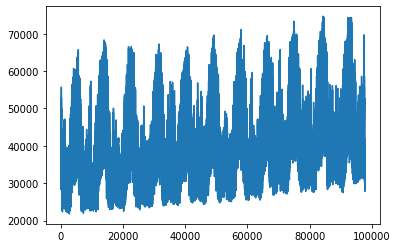

In [ ]:
# exploring target variable
energy['MWh'].plot()

## Data Cleaning

Pretty cool - looks like energy variabes between 20K and 70K megawatts.

In [ ]:
energy.isnull().sum() #look at the number of null values

Date    0
HE      0
MWh     1
dtype: int64

In [ ]:
energy[energy['MWh'].isnull()] #find row with null values

,Date,HE,MWh
60047,2016-11-07,0,NaN


In [ ]:
energy['MWh'] = energy.MWh.bfill() #fill the null row

In [ ]:
energy[energy['MWh'].isnull()] #check work

,Date,HE,MWh


In [ ]:
print(energy['Date'].min()) #check earliest date
print(energy['Date'].max()) #check latest date

2010-01-01
2021-03-01


In [ ]:
energy = energy.set_index(pd.to_datetime(energy['Date'])+pd.to_timedelta(energy['HE'],"h")) #reset index and clean daataset

In [ ]:
energy #check df

,Date,HE,MWh
2010-01-01 01:00:00,2010-01-01,1,32094.064435
2010-01-01 02:00:00,2010-01-01,2,32171.322546
2010-01-01 03:00:00,2010-01-01,3,32241.752463
2010-01-01 04:00:00,2010-01-01,4,32459.193227
2010-01-01 05:00:00,2010-01-01,5,33123.751047
...,...,...,...
2021-02-28 20:00:00,2021-02-28,20,40323.958388
2021-02-28 21:00:00,2021-02-28,21,39717.792981
2021-02-28 22:00:00,2021-02-28,22,38432.480182
2021-02-28 23:00:00,2021-02-28,23,36406.502356


In [ ]:
del energy['Date'] #delete date column with repeating info
del energy['HE'] #delete HE column with unnecessary info

# Weather Data

Read the weather data.

In [ ]:
# https://drive.google.com/file/d/1vl2RKquLYS1QRyYE7ySIj24jPnXFp2od/view?usp=sharing
!gdown --id 1vl2RKquLYS1QRyYE7ySIj24jPnXFp2od

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1vl2RKquLYS1QRyYE7ySIj24jPnXFp2od
To: /content/FST.csv
100% 97.2M/97.2M [00:01<00:00, 79.9MB/s]


In [ ]:
weather = pd.read_csv('FST.csv') #reading data
weather.head() #look at the first few rows

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar
0,FST,2010-01-01 00:53,30.02,24.98,81.27,180.00,5.00,M,30.50,1031.80,...,M,M,M,M,M,M,M,M,24.04,METAR KFST 010553Z AUTO 18005KT 10SM CLR M01/M...
1,FST,2010-01-01 01:53,28.04,24.08,84.87,190.00,5.00,M,30.49,1031.30,...,M,M,M,M,M,M,M,M,21.69,METAR KFST 010653Z AUTO 19005KT 10SM CLR M02/M...
2,FST,2010-01-01 02:53,26.96,23.00,84.80,220.00,9.00,M,30.47,1030.90,...,M,M,M,M,M,M,M,M,17.25,METAR KFST 010753Z AUTO 22009KT 10SM CLR M03/M...
3,FST,2010-01-01 03:53,26.96,23.00,84.80,210.00,8.00,M,30.46,1030.40,...,M,M,M,M,M,M,M,M,17.90,METAR KFST 010853Z AUTO 21008KT 10SM CLR M03/M...
4,FST,2010-01-01 04:53,28.04,23.00,81.11,220.00,12.00,M,30.44,1030.00,...,M,M,M,M,M,M,M,M,16.96,METAR KFST 010953Z AUTO 22012KT 10SM CLR M02/M...


In [ ]:
weather['valid'] = pd.to_datetime(weather['valid']) #convert to timestamp
weather.dtypes #look at data types of columns

station                      object
valid                datetime64[ns]
tmpf                         object
dwpf                         object
relh                         object
drct                         object
sknt                         object
p01i                         object
alti                         object
mslp                         object
vsby                         object
gust                         object
skyc1                        object
skyc2                        object
skyc3                        object
skyc4                        object
skyl1                        object
skyl2                        object
skyl3                        object
skyl4                        object
wxcodes                      object
ice_accretion_1hr            object
ice_accretion_3hr            object
ice_accretion_6hr            object
peak_wind_gust               object
peak_wind_drct               object
peak_wind_time               object
feel                        

In [ ]:
# look at the datetime range
print(weather['valid'].min())
print(weather['valid'].max())

2010-01-01 00:53:00
2021-02-19 23:55:00


The most important variables that are focused on are:
* tmpf
*	dwpf
*	relh


In [ ]:
#convert variables to numeric
weather['dwpf'] = pd.to_numeric(weather['dwpf'], errors='coerce')
weather['relh'] = pd.to_numeric(weather['relh'], errors='coerce')
weather['tmpf'] = pd.to_numeric(weather['tmpf'], errors='coerce')
weather['feel'] = pd.to_numeric(weather['feel'], errors='coerce')

In [ ]:
weather_tmp = weather[['valid','dwpf','tmpf','relh','feel']] #create new df

In [ ]:
weather_tmp #check new df

,valid,dwpf,tmpf,relh,feel
0,2010-01-01 00:53:00,24.98,30.02,81.27,24.04
1,2010-01-01 01:53:00,24.08,28.04,84.87,21.69
2,2010-01-01 02:53:00,23.00,26.96,84.80,17.25
3,2010-01-01 03:53:00,23.00,26.96,84.80,17.90
4,2010-01-01 04:53:00,23.00,28.04,81.11,16.96
...,...,...,...,...,...
581119,2021-02-19 23:40:00,NaN,NaN,NaN,NaN
581120,2021-02-19 23:45:00,NaN,NaN,NaN,NaN
581121,2021-02-19 23:50:00,NaN,NaN,NaN,NaN
581122,2021-02-19 23:53:00,32.00,44.10,62.21,37.76


In [ ]:
weather_tmp.set_index(weather_tmp['valid'], inplace=True) #replacing index
del weather_tmp['valid'] #deleting unnecesary column

## Resampling
Bring data to hourly basis

In [ ]:
weather_tmp =weather_tmp.resample('60min', origin='2010-01-01 00:00:00').max() #resample data by the hour

## Data Cleaning

Check for any null values

In [ ]:
weather_null = weather_tmp.isna().any(axis=1) #create df with null values
weather_tmp[weather_null] #check for null values in tmp df with important variables

,dwpf,tmpf,relh,feel
valid,,,,
2010-01-09 15:00:00,17.96,51.98,NaN,NaN
2010-01-13 14:00:00,15.98,64.04,NaN,NaN
2010-01-14 08:00:00,35.06,37.94,NaN,NaN
2010-01-27 15:00:00,NaN,NaN,NaN,NaN
2010-01-28 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-02-19 10:00:00,21.00,33.10,60.71,NaN
2021-02-19 15:00:00,27.00,50.00,40.62,NaN
2021-02-19 16:00:00,24.10,53.10,32.11,NaN


In [ ]:
# bfill the values
weather_tmp=weather_tmp.bfill(axis ='rows')

In [ ]:
# Check if null values have been replaced
weather_tmp[weather_null]

,dwpf,tmpf,relh,feel
valid,,,,
2010-01-09 15:00:00,17.96,51.98,25.79,51.98
2010-01-13 14:00:00,15.98,64.04,13.78,66.02
2010-01-14 08:00:00,35.06,37.94,82.17,37.07
2010-01-27 15:00:00,46.94,64.04,53.73,64.04
2010-01-28 04:00:00,51.98,55.94,86.52,55.94
...,...,...,...,...
2021-02-19 10:00:00,21.00,33.10,60.71,34.71
2021-02-19 15:00:00,27.00,50.00,40.62,42.47
2021-02-19 16:00:00,24.10,53.10,32.11,42.47


In [ ]:
# Merge data
merged_df = pd.merge(energy,weather_tmp,left_index=True,right_index=True,how='outer')
merged_df=merged_df.loc['2010-01-01':'2020-12-31']

In [ ]:
merged_df #check work

,MWh,dwpf,tmpf,relh,feel
2010-01-01 00:00:00,NaN,24.98,30.02,81.27,24.04
2010-01-01 01:00:00,32094.064435,24.08,28.04,84.87,21.69
2010-01-01 02:00:00,32171.322546,23.00,26.96,84.80,17.25
2010-01-01 03:00:00,32241.752463,23.00,26.96,84.80,17.90
2010-01-01 04:00:00,32459.193227,23.00,28.04,81.11,16.96
...,...,...,...,...,...
2020-12-31 19:00:00,50480.019624,27.00,32.00,81.55,23.51
2020-12-31 20:00:00,49349.203353,26.10,30.90,82.15,22.15
2020-12-31 21:00:00,47980.656897,21.90,28.00,77.57,17.95
2020-12-31 22:00:00,46754.840878,19.00,26.10,74.16,21.94


This number does not look correct. There may be duplicate rows.

In [ ]:
merged_df[merged_df.index.duplicated(keep=False)] #check duplicates

,MWh,dwpf,tmpf,relh,feel
2010-11-07 02:00:00,24316.097768,19.94,53.96,26.11,53.96
2010-11-07 02:00:00,23939.654940,19.94,53.96,26.11,53.96
2011-11-06 02:00:00,24360.877513,32.00,55.94,40.05,55.94
2011-11-06 02:00:00,23639.720619,32.00,55.94,40.05,55.94
2012-11-04 02:00:00,25400.843654,48.92,51.98,89.26,51.98
2012-11-04 02:00:00,24450.004610,48.92,51.98,89.26,51.98
2013-11-03 02:00:00,25178.478871,32.00,53.06,44.48,53.06
2013-11-03 02:00:00,24679.448997,32.00,53.06,44.48,53.06
2014-11-02 02:00:00,25984.609229,46.04,55.04,71.60,55.04
2014-11-02 02:00:00,25495.906633,46.04,55.04,71.60,55.04


These seem to be aroung the time when we have Day-light savings additional hour. We can just keep 1 row for each of these cases

In [ ]:
merged_df = merged_df[~merged_df.index.duplicated(keep='first')] #keep first instance
merged_df[merged_df.index.duplicated(keep=False)] #check for duplicates

,MWh,dwpf,tmpf,relh,feel


Now lets see if we have any missing values

In [ ]:
merged_df_null = merged_df.isna().any(axis=1) #missing values
merged_df[merged_df_null] #checking missing values in the merged df

,MWh,dwpf,tmpf,relh,feel
2010-01-01 00:00:00,NaN,24.98,30.02,81.27,24.04
2010-03-14 02:00:00,NaN,15.98,55.94,20.48,55.94
2011-03-13 02:00:00,NaN,26.06,53.96,33.76,53.96
2012-03-11 02:00:00,NaN,32.00,33.98,92.36,29.73
2013-03-10 02:00:00,NaN,17.06,46.94,29.94,41.70
2014-03-09 02:00:00,NaN,28.94,42.98,57.35,37.64
2015-03-08 02:00:00,NaN,28.04,44.96,51.24,37.31
2016-03-13 02:00:00,NaN,21.92,60.08,22.77,60.08
2017-03-12 03:00:00,NaN,48.90,51.10,92.14,51.10
2018-03-11 03:00:00,NaN,21.00,68.00,16.60,68.00


These fall at the same time when we have the and hour reduced for daylight saving. We will simply back fill them 

In [ ]:
merged_df=merged_df.bfill(axis ='rows') #fill null rows

In [ ]:
# Check if the nulls were filled correctly
merged_df[merged_df_null]

,MWh,dwpf,tmpf,relh,feel
2010-01-01 00:00:00,32094.064435,24.98,30.02,81.27,24.04
2010-03-14 02:00:00,23391.858503,15.98,55.94,20.48,55.94
2011-03-13 02:00:00,23424.765758,26.06,53.96,33.76,53.96
2012-03-11 02:00:00,26424.263253,32.00,33.98,92.36,29.73
2013-03-10 02:00:00,25190.222258,17.06,46.94,29.94,41.70
2014-03-09 02:00:00,31692.457777,28.94,42.98,57.35,37.64
2015-03-08 02:00:00,29415.855451,28.04,44.96,51.24,37.31
2016-03-13 02:00:00,25986.346427,21.92,60.08,22.77,60.08
2017-03-12 03:00:00,27141.826439,48.90,51.10,92.14,51.10
2018-03-11 03:00:00,29843.612296,21.00,68.00,16.60,68.00


In [ ]:
merged_df #view df

,MWh,dwpf,tmpf,relh,feel
2010-01-01 00:00:00,32094.064435,24.98,30.02,81.27,24.04
2010-01-01 01:00:00,32094.064435,24.08,28.04,84.87,21.69
2010-01-01 02:00:00,32171.322546,23.00,26.96,84.80,17.25
2010-01-01 03:00:00,32241.752463,23.00,26.96,84.80,17.90
2010-01-01 04:00:00,32459.193227,23.00,28.04,81.11,16.96
...,...,...,...,...,...
2020-12-31 19:00:00,50480.019624,27.00,32.00,81.55,23.51
2020-12-31 20:00:00,49349.203353,26.10,30.90,82.15,22.15
2020-12-31 21:00:00,47980.656897,21.90,28.00,77.57,17.95
2020-12-31 22:00:00,46754.840878,19.00,26.10,74.16,21.94


Seems about right, we have 11 years of hourly data and 3 leap years. We can see this below

In [ ]:
24*(365*11 + 3) #checking work

96432

# Feature Creation

One of the most important steps in this project was to create new features to increase the accuracy of the model. Some of these features were derived varibles, different representations of the variables, and interaction terms.

## Temporal Features


###Hour


In [ ]:
# Creating temporal features
merged_df['Hour']=merged_df.index.hour

In [ ]:
merged_df #checking work

,MWh,dwpf,tmpf,relh,feel,Hour
2010-01-01 00:00:00,32094.064435,24.98,30.02,81.27,24.04,0
2010-01-01 01:00:00,32094.064435,24.08,28.04,84.87,21.69,1
2010-01-01 02:00:00,32171.322546,23.00,26.96,84.80,17.25,2
2010-01-01 03:00:00,32241.752463,23.00,26.96,84.80,17.90,3
2010-01-01 04:00:00,32459.193227,23.00,28.04,81.11,16.96,4
...,...,...,...,...,...,...
2020-12-31 19:00:00,50480.019624,27.00,32.00,81.55,23.51,19
2020-12-31 20:00:00,49349.203353,26.10,30.90,82.15,22.15,20
2020-12-31 21:00:00,47980.656897,21.90,28.00,77.57,17.95,21
2020-12-31 22:00:00,46754.840878,19.00,26.10,74.16,21.94,22


### Hour Bucket
> * Early Morning = 1 (0 to 5Hrs) 
> * Morning = 2 (6 to 11Hrs)
> * Afternoon = 3 (12 to 17Hrs)
> * Night = 4 (18 to 23Hrs)

**Note:- We will not be using dummy variables for hour bucket and seasons as they are ordinal in nature. To preserve this order we give them sequence encoding**

In [ ]:
# Make bucket values
def hour_bucket(hr):
  if hr in range(6):
    return 1
  elif hr in range(6,12):
    return 2
  elif hr in range(12,18):
    return 3
  else:
    return 4 

In [ ]:
merged_df['Hour Bucket'] =merged_df['Hour'].apply(lambda hr: hour_bucket(hr)) #applying function to create a new column

In [ ]:
merged_df #checking work

,MWh,dwpf,tmpf,relh,feel,Hour,Hour Bucket
2010-01-01 00:00:00,32094.064435,24.98,30.02,81.27,24.04,0,1
2010-01-01 01:00:00,32094.064435,24.08,28.04,84.87,21.69,1,1
2010-01-01 02:00:00,32171.322546,23.00,26.96,84.80,17.25,2,1
2010-01-01 03:00:00,32241.752463,23.00,26.96,84.80,17.90,3,1
2010-01-01 04:00:00,32459.193227,23.00,28.04,81.11,16.96,4,1
...,...,...,...,...,...,...,...
2020-12-31 19:00:00,50480.019624,27.00,32.00,81.55,23.51,19,4
2020-12-31 20:00:00,49349.203353,26.10,30.90,82.15,22.15,20,4
2020-12-31 21:00:00,47980.656897,21.90,28.00,77.57,17.95,21,4
2020-12-31 22:00:00,46754.840878,19.00,26.10,74.16,21.94,22,4


###Day of Week


In [ ]:
merged_df['Day_of_week']=merged_df.index.dayofweek #indexing day of week

In [ ]:
merged_df #checking work

,MWh,dwpf,tmpf,relh,feel,Hour,Hour Bucket,Day_of_week
2010-01-01 00:00:00,32094.064435,24.98,30.02,81.27,24.04,0,1,4
2010-01-01 01:00:00,32094.064435,24.08,28.04,84.87,21.69,1,1,4
2010-01-01 02:00:00,32171.322546,23.00,26.96,84.80,17.25,2,1,4
2010-01-01 03:00:00,32241.752463,23.00,26.96,84.80,17.90,3,1,4
2010-01-01 04:00:00,32459.193227,23.00,28.04,81.11,16.96,4,1,4
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,50480.019624,27.00,32.00,81.55,23.51,19,4,3
2020-12-31 20:00:00,49349.203353,26.10,30.90,82.15,22.15,20,4,3
2020-12-31 21:00:00,47980.656897,21.90,28.00,77.57,17.95,21,4,3
2020-12-31 22:00:00,46754.840878,19.00,26.10,74.16,21.94,22,4,3


###Day of Month


In [ ]:
merged_df['Day_of_month']=merged_df.index.day #indexing day of month

In [ ]:
merged_df #checking work

,MWh,dwpf,tmpf,relh,feel,Hour,Hour Bucket,Day_of_week,Day_of_month
2010-01-01 00:00:00,32094.064435,24.98,30.02,81.27,24.04,0,1,4,1
2010-01-01 01:00:00,32094.064435,24.08,28.04,84.87,21.69,1,1,4,1
2010-01-01 02:00:00,32171.322546,23.00,26.96,84.80,17.25,2,1,4,1
2010-01-01 03:00:00,32241.752463,23.00,26.96,84.80,17.90,3,1,4,1
2010-01-01 04:00:00,32459.193227,23.00,28.04,81.11,16.96,4,1,4,1
...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,50480.019624,27.00,32.00,81.55,23.51,19,4,3,31
2020-12-31 20:00:00,49349.203353,26.10,30.90,82.15,22.15,20,4,3,31
2020-12-31 21:00:00,47980.656897,21.90,28.00,77.57,17.95,21,4,3,31
2020-12-31 22:00:00,46754.840878,19.00,26.10,74.16,21.94,22,4,3,31


###Day of Year


In [ ]:
merged_df['Day_of_year']=merged_df.index.dayofyear #indexing day of year

In [ ]:
merged_df #checking work

,MWh,dwpf,tmpf,relh,feel,Hour,Hour Bucket,Day_of_week,Day_of_month,Day_of_year
2010-01-01 00:00:00,32094.064435,24.98,30.02,81.27,24.04,0,1,4,1,1
2010-01-01 01:00:00,32094.064435,24.08,28.04,84.87,21.69,1,1,4,1,1
2010-01-01 02:00:00,32171.322546,23.00,26.96,84.80,17.25,2,1,4,1,1
2010-01-01 03:00:00,32241.752463,23.00,26.96,84.80,17.90,3,1,4,1,1
2010-01-01 04:00:00,32459.193227,23.00,28.04,81.11,16.96,4,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,50480.019624,27.00,32.00,81.55,23.51,19,4,3,31,366
2020-12-31 20:00:00,49349.203353,26.10,30.90,82.15,22.15,20,4,3,31,366
2020-12-31 21:00:00,47980.656897,21.90,28.00,77.57,17.95,21,4,3,31,366
2020-12-31 22:00:00,46754.840878,19.00,26.10,74.16,21.94,22,4,3,31,366


### Week


In [ ]:
merged_df['Week']=merged_df.index.isocalendar().week #indexing week of year

In [ ]:
merged_df #checking work

,MWh,dwpf,tmpf,relh,feel,Hour,Hour Bucket,Day_of_week,Day_of_month,Day_of_year,Week
2010-01-01 00:00:00,32094.064435,24.98,30.02,81.27,24.04,0,1,4,1,1,53
2010-01-01 01:00:00,32094.064435,24.08,28.04,84.87,21.69,1,1,4,1,1,53
2010-01-01 02:00:00,32171.322546,23.00,26.96,84.80,17.25,2,1,4,1,1,53
2010-01-01 03:00:00,32241.752463,23.00,26.96,84.80,17.90,3,1,4,1,1,53
2010-01-01 04:00:00,32459.193227,23.00,28.04,81.11,16.96,4,1,4,1,1,53
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,50480.019624,27.00,32.00,81.55,23.51,19,4,3,31,366,53
2020-12-31 20:00:00,49349.203353,26.10,30.90,82.15,22.15,20,4,3,31,366,53
2020-12-31 21:00:00,47980.656897,21.90,28.00,77.57,17.95,21,4,3,31,366,53
2020-12-31 22:00:00,46754.840878,19.00,26.10,74.16,21.94,22,4,3,31,366,53


###Weekend Flag


In [ ]:
merged_df["Is_Weekend"] = (merged_df['Day_of_week'] > 4)*1 #binary to check if the day was a weekend

In [ ]:
merged_df #checking work

,MWh,dwpf,tmpf,relh,feel,Hour,Hour Bucket,Day_of_week,Day_of_month,Day_of_year,Week,Is_Weekend
2010-01-01 00:00:00,32094.064435,24.98,30.02,81.27,24.04,0,1,4,1,1,53,0
2010-01-01 01:00:00,32094.064435,24.08,28.04,84.87,21.69,1,1,4,1,1,53,0
2010-01-01 02:00:00,32171.322546,23.00,26.96,84.80,17.25,2,1,4,1,1,53,0
2010-01-01 03:00:00,32241.752463,23.00,26.96,84.80,17.90,3,1,4,1,1,53,0
2010-01-01 04:00:00,32459.193227,23.00,28.04,81.11,16.96,4,1,4,1,1,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,50480.019624,27.00,32.00,81.55,23.51,19,4,3,31,366,53,0
2020-12-31 20:00:00,49349.203353,26.10,30.90,82.15,22.15,20,4,3,31,366,53,0
2020-12-31 21:00:00,47980.656897,21.90,28.00,77.57,17.95,21,4,3,31,366,53,0
2020-12-31 22:00:00,46754.840878,19.00,26.10,74.16,21.94,22,4,3,31,366,53,0


### Month


In [ ]:
merged_df['Month']=merged_df.index.month #indexing month of year

In [ ]:
merged_df #checking work

,MWh,dwpf,tmpf,relh,feel,Hour,Hour Bucket,Day_of_week,Day_of_month,Day_of_year,Week,Is_Weekend,Month
2010-01-01 00:00:00,32094.064435,24.98,30.02,81.27,24.04,0,1,4,1,1,53,0,1
2010-01-01 01:00:00,32094.064435,24.08,28.04,84.87,21.69,1,1,4,1,1,53,0,1
2010-01-01 02:00:00,32171.322546,23.00,26.96,84.80,17.25,2,1,4,1,1,53,0,1
2010-01-01 03:00:00,32241.752463,23.00,26.96,84.80,17.90,3,1,4,1,1,53,0,1
2010-01-01 04:00:00,32459.193227,23.00,28.04,81.11,16.96,4,1,4,1,1,53,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,50480.019624,27.00,32.00,81.55,23.51,19,4,3,31,366,53,0,12
2020-12-31 20:00:00,49349.203353,26.10,30.90,82.15,22.15,20,4,3,31,366,53,0,12
2020-12-31 21:00:00,47980.656897,21.90,28.00,77.57,17.95,21,4,3,31,366,53,0,12
2020-12-31 22:00:00,46754.840878,19.00,26.10,74.16,21.94,22,4,3,31,366,53,0,12


### Years since 2010


In [ ]:
merged_df['Year_Number']=merged_df.index.year-2010 #indexing year since

In [ ]:
merged_df #checking work

,MWh,dwpf,tmpf,relh,feel,Hour,Hour Bucket,Day_of_week,Day_of_month,Day_of_year,Week,Is_Weekend,Month,Year_Number
2010-01-01 00:00:00,32094.064435,24.98,30.02,81.27,24.04,0,1,4,1,1,53,0,1,0
2010-01-01 01:00:00,32094.064435,24.08,28.04,84.87,21.69,1,1,4,1,1,53,0,1,0
2010-01-01 02:00:00,32171.322546,23.00,26.96,84.80,17.25,2,1,4,1,1,53,0,1,0
2010-01-01 03:00:00,32241.752463,23.00,26.96,84.80,17.90,3,1,4,1,1,53,0,1,0
2010-01-01 04:00:00,32459.193227,23.00,28.04,81.11,16.96,4,1,4,1,1,53,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,50480.019624,27.00,32.00,81.55,23.51,19,4,3,31,366,53,0,12,10
2020-12-31 20:00:00,49349.203353,26.10,30.90,82.15,22.15,20,4,3,31,366,53,0,12,10
2020-12-31 21:00:00,47980.656897,21.90,28.00,77.57,17.95,21,4,3,31,366,53,0,12,10
2020-12-31 22:00:00,46754.840878,19.00,26.10,74.16,21.94,22,4,3,31,366,53,0,12,10


###Months since 2010 Jan


In [ ]:
merged_df['Month_Number']=merged_df['Year_Number']*12 + (merged_df['Month']-1) #indexing month since

In [ ]:
merged_df #checking work

,MWh,dwpf,tmpf,relh,feel,Hour,Hour Bucket,Day_of_week,Day_of_month,Day_of_year,Week,Is_Weekend,Month,Year_Number,Month_Number
2010-01-01 00:00:00,32094.064435,24.98,30.02,81.27,24.04,0,1,4,1,1,53,0,1,0,0
2010-01-01 01:00:00,32094.064435,24.08,28.04,84.87,21.69,1,1,4,1,1,53,0,1,0,0
2010-01-01 02:00:00,32171.322546,23.00,26.96,84.80,17.25,2,1,4,1,1,53,0,1,0,0
2010-01-01 03:00:00,32241.752463,23.00,26.96,84.80,17.90,3,1,4,1,1,53,0,1,0,0
2010-01-01 04:00:00,32459.193227,23.00,28.04,81.11,16.96,4,1,4,1,1,53,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,50480.019624,27.00,32.00,81.55,23.51,19,4,3,31,366,53,0,12,10,131
2020-12-31 20:00:00,49349.203353,26.10,30.90,82.15,22.15,20,4,3,31,366,53,0,12,10,131
2020-12-31 21:00:00,47980.656897,21.90,28.00,77.57,17.95,21,4,3,31,366,53,0,12,10,131
2020-12-31 22:00:00,46754.840878,19.00,26.10,74.16,21.94,22,4,3,31,366,53,0,12,10,131


###Holiday Flag


In [ ]:
# Get Texas Holidays
us_tx_holidays = holidays.country_holidays('US', subdiv='TX')

# Get the date and check if it is in the dictionary
merged_df['Date']=merged_df.index.strftime('%Y-%m-%d')
merged_df['Holiday'] = merged_df['Date'].apply(lambda x: (x in us_tx_holidays)*1)

In [ ]:
merged_df #checking work

,MWh,dwpf,tmpf,relh,feel,Hour,Hour Bucket,Day_of_week,Day_of_month,Day_of_year,Week,Is_Weekend,Month,Year_Number,Month_Number,Date,Holiday
2010-01-01 00:00:00,32094.064435,24.98,30.02,81.27,24.04,0,1,4,1,1,53,0,1,0,0,2010-01-01,1
2010-01-01 01:00:00,32094.064435,24.08,28.04,84.87,21.69,1,1,4,1,1,53,0,1,0,0,2010-01-01,1
2010-01-01 02:00:00,32171.322546,23.00,26.96,84.80,17.25,2,1,4,1,1,53,0,1,0,0,2010-01-01,1
2010-01-01 03:00:00,32241.752463,23.00,26.96,84.80,17.90,3,1,4,1,1,53,0,1,0,0,2010-01-01,1
2010-01-01 04:00:00,32459.193227,23.00,28.04,81.11,16.96,4,1,4,1,1,53,0,1,0,0,2010-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,50480.019624,27.00,32.00,81.55,23.51,19,4,3,31,366,53,0,12,10,131,2020-12-31,0
2020-12-31 20:00:00,49349.203353,26.10,30.90,82.15,22.15,20,4,3,31,366,53,0,12,10,131,2020-12-31,0
2020-12-31 21:00:00,47980.656897,21.90,28.00,77.57,17.95,21,4,3,31,366,53,0,12,10,131,2020-12-31,0
2020-12-31 22:00:00,46754.840878,19.00,26.10,74.16,21.94,22,4,3,31,366,53,0,12,10,131,2020-12-31,0


###Season

In [ ]:
# Get Seasons
def season_of_date(month):
  if month in [3,4,5]:
    return 1
  elif month in [6,7,8]:
    return 2
  elif month in [9,10,11]:
    return 3
  else:
    return 4 

In [ ]:
merged_df['season'] = merged_df['Month'].apply(lambda month: season_of_date(month)) #creating seasons column, applying function

In [ ]:
merged_df #checking work

,MWh,dwpf,tmpf,relh,feel,Hour,Hour Bucket,Day_of_week,Day_of_month,Day_of_year,Week,Is_Weekend,Month,Year_Number,Month_Number,Date,Holiday,season
2010-01-01 00:00:00,32094.064435,24.98,30.02,81.27,24.04,0,1,4,1,1,53,0,1,0,0,2010-01-01,1,4
2010-01-01 01:00:00,32094.064435,24.08,28.04,84.87,21.69,1,1,4,1,1,53,0,1,0,0,2010-01-01,1,4
2010-01-01 02:00:00,32171.322546,23.00,26.96,84.80,17.25,2,1,4,1,1,53,0,1,0,0,2010-01-01,1,4
2010-01-01 03:00:00,32241.752463,23.00,26.96,84.80,17.90,3,1,4,1,1,53,0,1,0,0,2010-01-01,1,4
2010-01-01 04:00:00,32459.193227,23.00,28.04,81.11,16.96,4,1,4,1,1,53,0,1,0,0,2010-01-01,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,50480.019624,27.00,32.00,81.55,23.51,19,4,3,31,366,53,0,12,10,131,2020-12-31,0,4
2020-12-31 20:00:00,49349.203353,26.10,30.90,82.15,22.15,20,4,3,31,366,53,0,12,10,131,2020-12-31,0,4
2020-12-31 21:00:00,47980.656897,21.90,28.00,77.57,17.95,21,4,3,31,366,53,0,12,10,131,2020-12-31,0,4
2020-12-31 22:00:00,46754.840878,19.00,26.10,74.16,21.94,22,4,3,31,366,53,0,12,10,131,2020-12-31,0,4


## Weather Features

1. 3,6,12,24 rolling average/max min for all variables
1. Temperature polinomial terms
1. Extreme temperature flag
1. Dew point temperature greater than 60 or 65 F, creates a possibility of thunderstorm

      https://www.weather.gov/epz/research_papers_jardb

      http://tornado.sfsu.edu/geosciences/classes/m356/Dewpoint.htm

### Extreme Temperature Flag

The average extreme temperature in this region is around 66.5 F. 

1 --> Cold


0 --> Hot

Extreme temperatures are two cases:
1. Hot flag: temperature is over 80F
2. Cold flag: temperature is below 35F

In [ ]:
merged_df['Hot_flag'] = ((merged_df['tmpf'] > 80.0))*1 #creating hot flag for above 80F
merged_df['Cold_flag'] = ((merged_df['tmpf'] < 35.0))*1 #creating cold flag for below 35F

### Polynomial Temperature 

In [ ]:
# Polynomial Terms for columns

def poly_temp(df, n=2):
  df_tmp = df.copy()
  for i in range(2, n+1):
    df_tmp['tmpf_{}'.format(i)] = df_tmp['tmpf'].apply(lambda x: x**i)
  return df_tmp


In [ ]:
merged_df=poly_temp(merged_df,3) #create polynomial terms as columns

### Moving Averages

In [ ]:
avg_periods = [3,6,12,24] #define times
avg_list = ['dwpf','tmpf','relh'] #get important variables

#function to define rolling averages
def rolling_average(df):
  df_tmp = df.copy()
  for var in avg_list:
    for i in avg_periods:
      df_tmp['{}_ma_{}'.format(var,i)] = df_tmp[var].rolling(window=i).mean()
  return df_tmp

### Max/Min over windows 

In [ ]:
minmax_periods = [12,24] #min max range
minmax_list = ['dwpf','tmpf','relh'] #getting variables

#defiing function to compute the minmax values
def rolling_minmax(df):
  df_tmp = df.copy()  
  for var in minmax_list:
    for i in minmax_periods:
      df_tmp['{}_min_{}'.format(var,i)] = df_tmp[var].rolling(window=i).min()
      df_tmp['{}_max_{}'.format(var,i)] = df_tmp[var].rolling(window=i).max()
  return df_tmp

In [ ]:
Final_df=rolling_average(merged_df) #applying the rolling average function
Final_df=rolling_minmax(Final_df) #applying the rolling minmax function

### Interaction terms

For feature creation, we took a look at intearction terms to see if two or more variables contributed more to the model. For this analysis we used JMP and came up with the parameter estimates. Now we are going to be creating columns with the new formula.

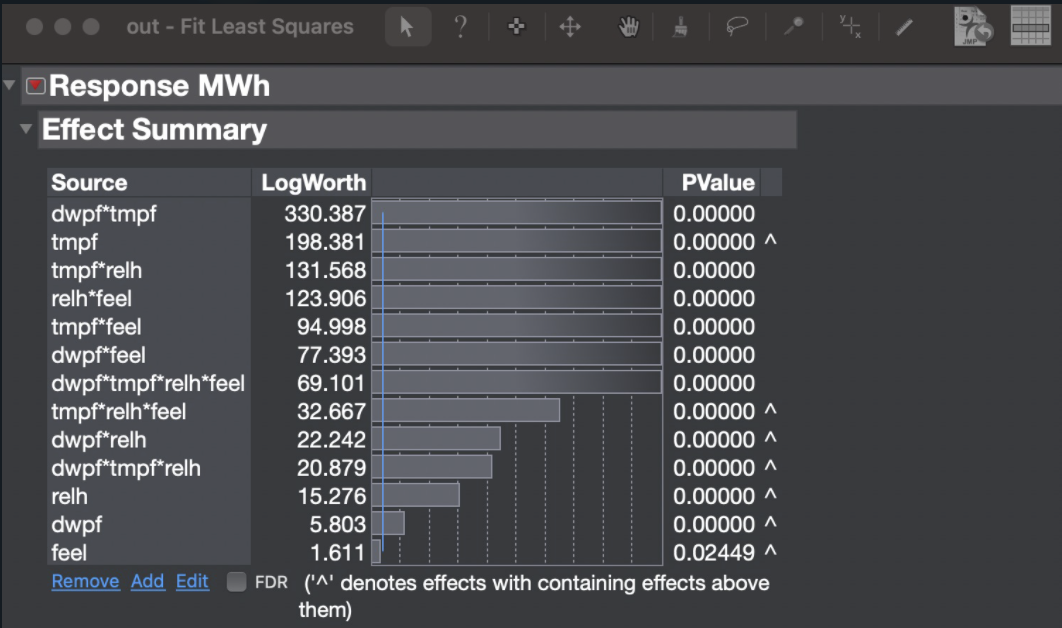

In [ ]:
#interaction terms created from existing important variables
Final_df['Int_tmpf_dwpf'] = Final_df['tmpf']*Final_df['dwpf']
Final_df['Int_tmpf_relh'] = Final_df['tmpf']*Final_df['relh']
Final_df['Int_tmpf_feel'] = Final_df['tmpf']*Final_df['feel']
Final_df['Int_relh_feel'] = Final_df['relh']*Final_df['feel']
Final_df['Int_dwpf_feel'] = Final_df['dwpf']*Final_df['feel']

# EDA

In [ ]:
eda = Final_df.copy() #creating a copy df for eda

In [ ]:
eda.head() #viewing first few rows

,MWh,dwpf,tmpf,relh,feel,Hour,Hour Bucket,Day_of_week,Day_of_month,Day_of_year,...,tmpf_max_24,relh_min_12,relh_max_12,relh_min_24,relh_max_24,Int_tmpf_dwpf,Int_tmpf_relh,Int_tmpf_feel,Int_relh_feel,Int_dwpf_feel
2010-01-01 00:00:00,32094.064435,24.98,30.02,81.27,24.04,0,1,4,1,1,...,NaN,NaN,NaN,NaN,NaN,749.8996,2439.7254,721.6808,1953.7308,600.5192
2010-01-01 01:00:00,32094.064435,24.08,28.04,84.87,21.69,1,1,4,1,1,...,NaN,NaN,NaN,NaN,NaN,675.2032,2379.7548,608.1876,1840.8303,522.2952
2010-01-01 02:00:00,32171.322546,23.00,26.96,84.80,17.25,2,1,4,1,1,...,NaN,NaN,NaN,NaN,NaN,620.0800,2286.2080,465.0600,1462.8000,396.7500
2010-01-01 03:00:00,32241.752463,23.00,26.96,84.80,17.90,3,1,4,1,1,...,NaN,NaN,NaN,NaN,NaN,620.0800,2286.2080,482.5840,1517.9200,411.7000
2010-01-01 04:00:00,32459.193227,23.00,28.04,81.11,16.96,4,1,4,1,1,...,NaN,NaN,NaN,NaN,NaN,644.9200,2274.3244,475.5584,1375.6256,390.0800


## Scatter Plot

Text(0.5, 1.0, 'Scatter plot of Energy consumption and temperature ')

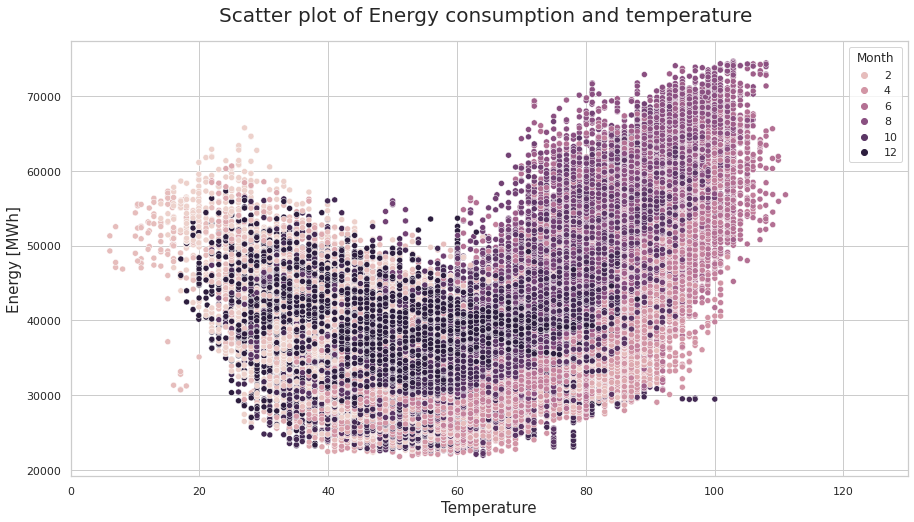

In [ ]:
# Scatter plot for Energy consumption and temperature

sns.set(style='whitegrid')
gfg= sns.scatterplot(x="tmpf",
                    y="MWh",
                    hue="Month",
                    #style="event",
                    data= eda)
gfg.set_ylim()
gfg.set_xlim(0, 130, 10)

#rcParams['figure.figsize'] = 15, 8
sns.set(rc={'figure.figsize':(15,8)})

gfg.set_ylabel("Energy [MWh]", fontsize = 15)
gfg.set_xlabel("Temperature", fontsize = 15)
gfg.set_title("Scatter plot of Energy consumption and temperature ", fontsize = 20, pad = 20)

Text(0.5, 1.0, 'Scatter plot of Energy consumption and temperature_Square ')

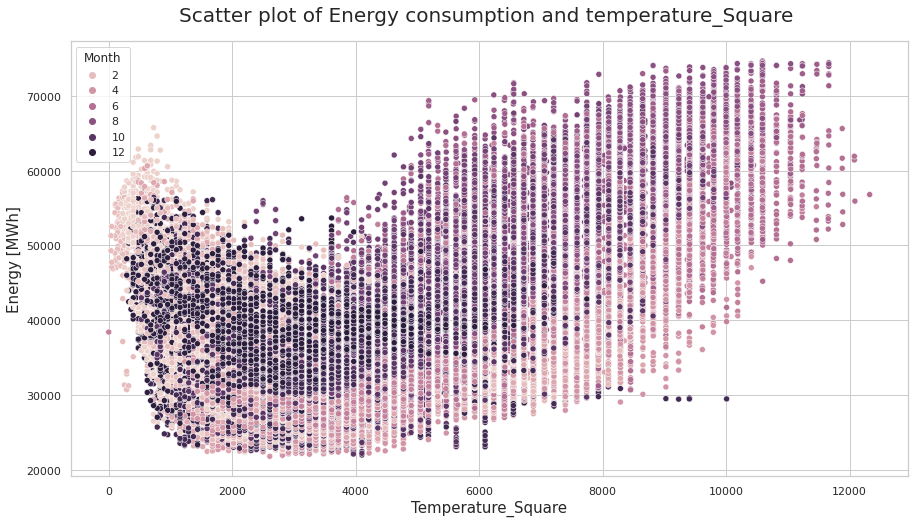

In [ ]:
#Scatterplot of energy consumption and temperature squared
sns.set(style='whitegrid')
tmpf_2= sns.scatterplot(x="tmpf_2",
                    y="MWh",
                    hue="Month",
                    data= eda)

sns.set(rc={'figure.figsize':(15,8)})
tmpf_2.set_ylabel("Energy [MWh]", fontsize = 15)
tmpf_2.set_xlabel("Temperature_Square", fontsize = 15)
tmpf_2.set_title("Scatter plot of Energy consumption and temperature_Square ", fontsize = 20, pad = 20)

In [ ]:
#Scatterplot of energy consumption and temperature cubed
sns.set(style='whitegrid')
tmpf_2= sns.scatterplot(x="tmpf_3",
                    y="MWh",
                    hue="Month",
                    data= eda)

sns.set(rc={'figure.figsize':(15,8)})
tmpf_2.set_ylabel("Energy [MWh]", fontsize = 15)
tmpf_2.set_xlabel("Temperature_Square", fontsize = 15)
tmpf_2.set_title("Scatter plot of Energy consumption and temperature_cubed ", fontsize = 20, pad = 20)

Text(0.5, 1.0, 'Scatter plot of Energy consumption and feel')

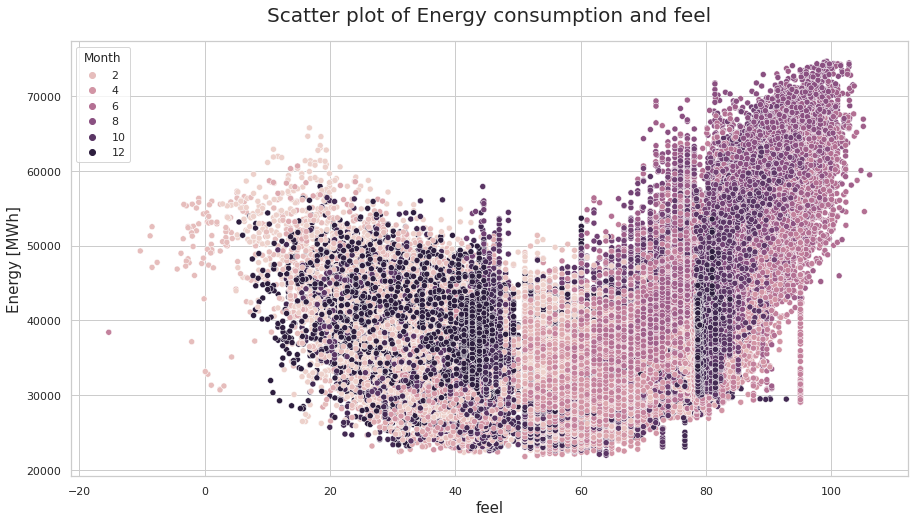

In [ ]:
#Scatter plot of Energy consumption and feel
sns.set(style='whitegrid')
tmpf_3= sns.scatterplot(x="feel",
                    y="MWh",
                    hue ="Month",
                    data= eda)
#tmpf_2.set_ylim()
#tmpf_3.set_xlim(-2 ,1368370.393 )

sns.set(rc={'figure.figsize':(15,8)})

tmpf_3.set_ylabel("Energy [MWh]", fontsize = 15)
tmpf_3.set_xlabel("feel", fontsize = 15)
tmpf_3.set_title("Scatter plot of Energy consumption and feel", fontsize = 20, pad = 20)

Inference from the scatterplots: There is a parabolic relationship between energy consumption and temperature. The energy consumption increases with extreme temperatures. The plot also indicates the seasons. Summer months, with high temperatures have higher energy consumption. Simiarly, winter months with lower temperatures have higher energy consumptions. The months in between with moderate temperature have moderate energy consumption. The plot by polynomial terms also give us similar information but with more spread out results. Feel and energy consumption scatterplots give us the same results as temperature and energy consumption as temperature and feel are highly correlated variables.

## Timeseries Plot

Text(0.5, 1.0, 'Energy Consumption from 2010 - 2020 ')

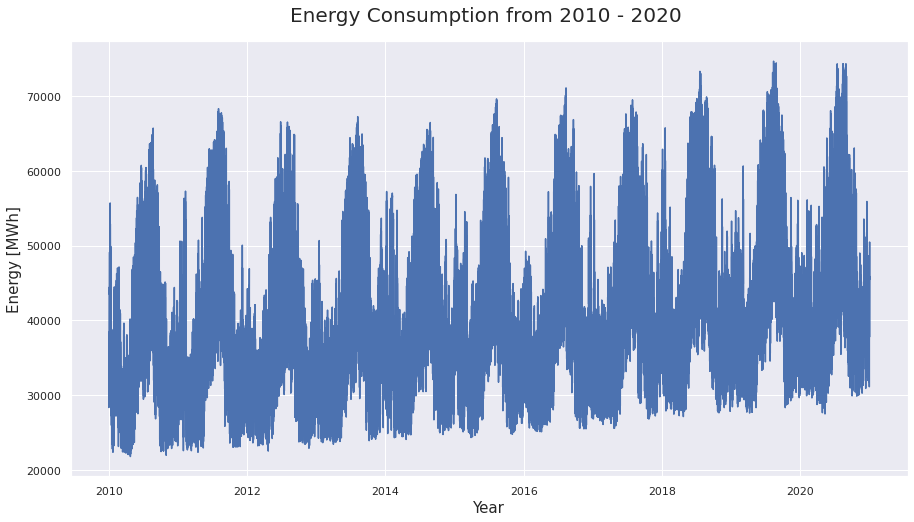

In [ ]:
#looking at the energy consumption from 2010-2020
sns.set_theme(style="darkgrid")

trend =sns.lineplot(x= eda.index, y="MWh",data= eda )

sns.set(rc={'figure.figsize':(15,8)})
trend.set_ylabel("Energy [MWh]", fontsize = 15)
trend.set_xlabel("Year", fontsize = 15)
trend.set_title("Energy Consumption from 2010 - 2020 ", fontsize = 20, pad = 20)

The timeseries plot shows us seasonality all throughout. Overall through the decade there is seasonality with and additive trend. However, looking at each year individually, there is a lot of random variation. This tells us that similar to the parabolic trend, there is little to no trend for the year but that same pattern repeats each year, through the years.

## Boxplot

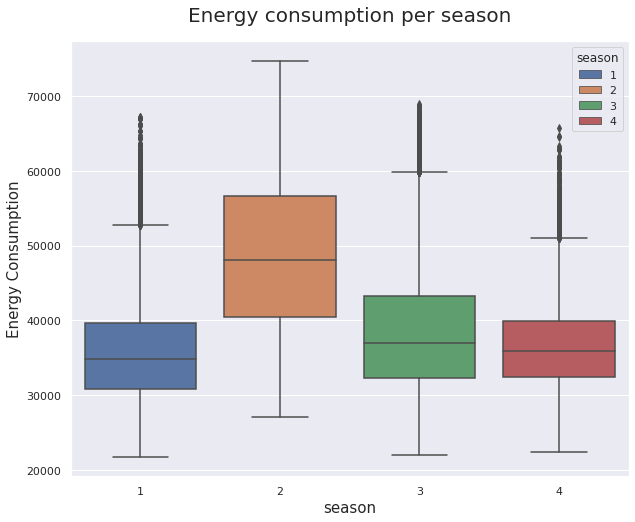

In [ ]:
# plot the boxplot for energy consumption by season
plt.figure(figsize=(10,8))
plot_boxplot = sns.boxplot(x= "season", y="MWh", hue = "season", data=eda, dodge=False)
plot_boxplot.set_ylabel("Energy Consumption", fontsize = 15)
plot_boxplot.set_xlabel("season", fontsize = 15)
plot_boxplot.set_title("Energy consumption per season", fontsize = 20, pad = 20)
plt.show()


# 1 --> Spring
# 2 --> Summer
# 3 --> Fall
# 4 --> Winter

Summer seasons seem to have higher energy consumption. Given that Texas is a state that has a lot of heat, the boxplot showing higher energy consumption confirms the trend. Summer months have no outliers and also more observations clustered around the 50% range. For the outliers in Spring and Fall with higher energy consumption, they can be attributed to sudden changes in temperature. Occasionally before Summer, the month of May could have increased temperatures resulting in higher enery consumption. A similar conclusion can be drawn for September during the fall.

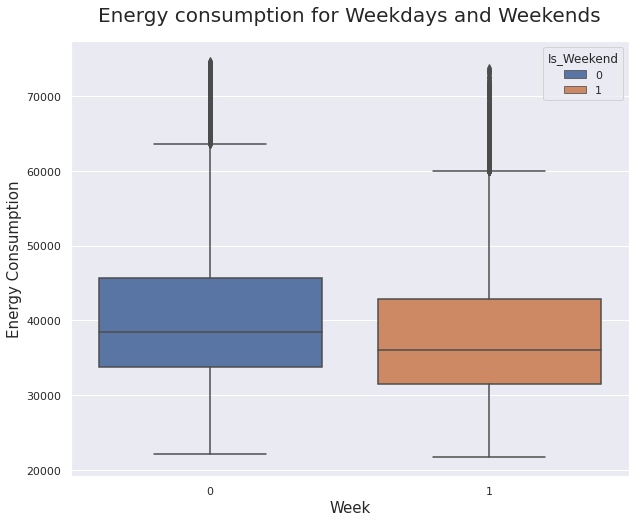

In [ ]:
# plot the boxplot for energy consumption by weekend
plt.figure(figsize=(10,8))
plot_boxplot = sns.boxplot(x= "Is_Weekend", y="MWh", hue = "Is_Weekend", data=eda, dodge=False)
plot_boxplot.set_ylabel("Energy Consumption", fontsize = 15)
plot_boxplot.set_xlabel("Week", fontsize = 15)
plot_boxplot.set_title("Energy consumption for Weekdays and Weekends", fontsize = 20, pad = 20)
plt.show()

There is little to no difference between energy difference between energy consumption on a weekend or a weekday.

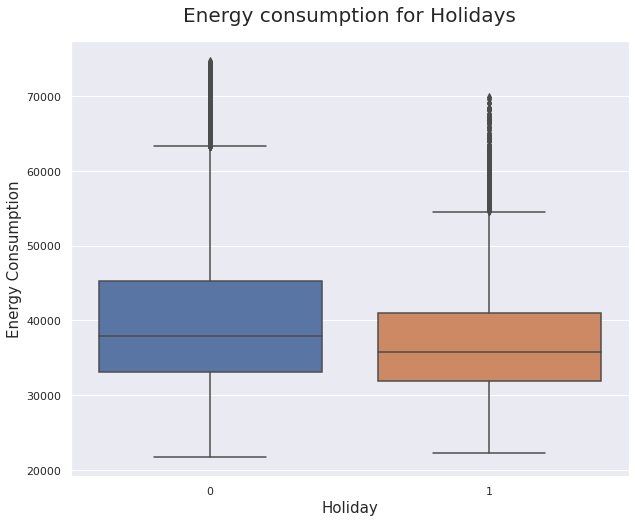

In [ ]:
# plot the boxplot by holidays indicator
plt.figure(figsize=(10,8))
plot_boxplot = sns.boxplot(x= "Holiday", y="MWh", data=eda, dodge=False)
plot_boxplot.set_ylabel("Energy Consumption", fontsize = 15)
plot_boxplot.set_xlabel("Holiday", fontsize = 15)
plot_boxplot.set_title("Energy consumption for Holidays", fontsize = 20, pad = 20)
plt.show()

There is little to no difference between energy difference between energy consumption on a holiday or not a holiday.

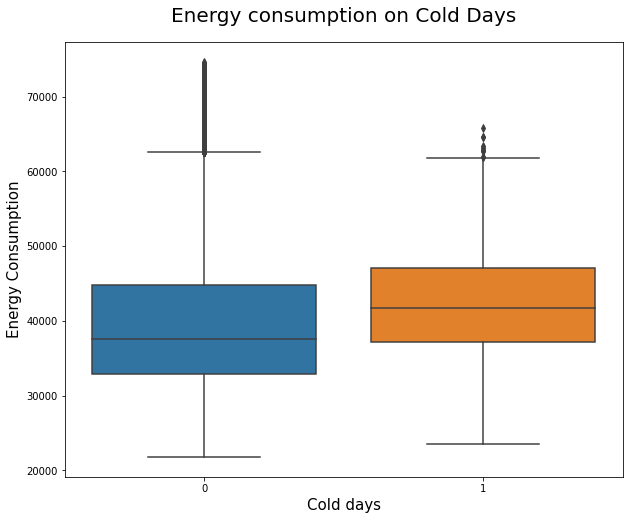

In [ ]:
# plot the boxplot energy consumption on cold days
plt.figure(figsize=(10,8))
plot_boxplot = sns.boxplot(x= "Cold_flag", y="MWh", data=eda, dodge=False)
plot_boxplot.set_ylabel("Energy Consumption", fontsize = 15)
plot_boxplot.set_xlabel("Cold days", fontsize = 15)
plot_boxplot.set_title("Energy consumption on Cold Days", fontsize = 20, pad = 20)
plt.show()

As expected, the energy consumption for colder days is slightly more with a few outliers.

## HeatMap

In [ ]:
eda_heatmap = eda.copy()
eda_heatmap = eda.drop(['Date'], axis = 1) #drop date column

In [ ]:
%matplotlib inline

Text(0.5, 1.0, 'Correlation Matrix')

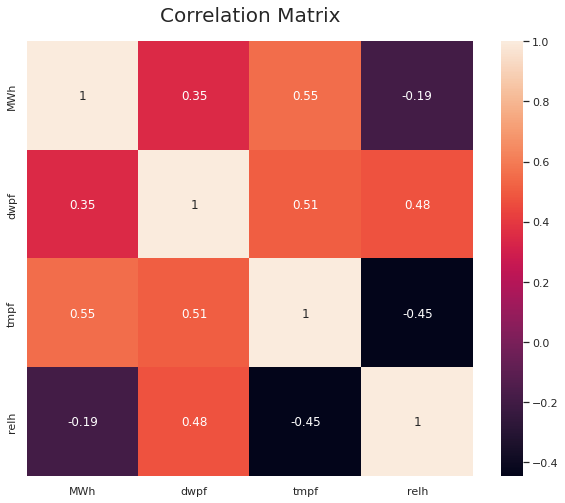

In [ ]:
# exclude the timestamp related variables
corr = eda.iloc[:,0:5]

# Correlation function
corr = corr.corr()
# Plotting Heatmap
corr_matrix = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot = True)
sns.set(rc={'figure.figsize':(12,10)})
corr_matrix.set_title("Correlation Matrix", fontsize = 20, pad = 20)

The temperature has a positive correlation with MWh. As the temperature increases, the energy consumption also increases.

Dew point is simply the temperature at which the water vapor condensates to liquid water. So if the temperature is high, the dew point will be high which can be seen in the correlation matrix above.

Further, we can see that there is a negative correlation between temperature and relative humidity. This is because the smaller the difference between the temperature and the dew point temperature, the higher the relative humidity.

In [ ]:
# Final_df.to_csv('Final_Data.csv') #saving and downloading the csv
# !cp Final_Data.csv "/content/drive/Shareddrives/Deep Learning Team Project/Project 2/Model_Data_Apr_23.csv"

In [ ]:
Final_df #checking work

,MWh,dwpf,Hour,Day_of_month,Day_of_year,Is_Weekend,Month,Year_Number,Month_Number,Date,...,relh_ma_6,relh_ma_12,dwpf_max_12,dwpf_min_24,dwpf_max_24,tmpf_max_12,relh_max_12,Int_tmpf_dwpf,Int_tmpf_feel,Int_dwpf_feel
2010-01-01 00:00:00,32094.064435,24.98,0,1,1,0,1,0,0,2010-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,749.8996,721.6808,600.5192
2010-01-01 01:00:00,32094.064435,24.08,1,1,1,0,1,0,0,2010-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,675.2032,608.1876,522.2952
2010-01-01 02:00:00,32171.322546,23.00,2,1,1,0,1,0,0,2010-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620.0800,465.0600,396.7500
2010-01-01 03:00:00,32241.752463,23.00,3,1,1,0,1,0,0,2010-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,620.0800,482.5840,411.7000
2010-01-01 04:00:00,32459.193227,23.00,4,1,1,0,1,0,0,2010-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,644.9200,475.5584,390.0800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,50480.019624,27.00,19,31,366,0,12,10,131,2020-12-31,...,88.045000,92.103333,28.9,27.0,32.0,32.0,100.00,864.0000,752.3200,634.7700
2020-12-31 20:00:00,49349.203353,26.10,20,31,366,0,12,10,131,2020-12-31,...,86.378333,90.615833,28.9,26.1,32.0,32.0,100.00,806.4900,684.4350,578.1150
2020-12-31 21:00:00,47980.656897,21.90,21,31,366,0,12,10,131,2020-12-31,...,83.371667,88.746667,28.9,21.9,30.9,32.0,100.00,613.2000,502.6000,393.1050
2020-12-31 22:00:00,46754.840878,19.00,22,31,366,0,12,10,131,2020-12-31,...,80.373333,86.895000,28.9,19.0,30.9,32.0,100.00,495.9000,572.6340,416.8600


# **Considering Additional Weather Data**

ERCOT energy consumption is a total of all the regions from Texas. Based on the following Link :- https://www.ercot.com/files/docs/2021/11/22/temperature_template.pdf

We have decided to bring in weather information of the Major Cities under ERCOT

We have made another file for repeating the entire preprocessing we did for the region FST. We will load the dataframes directly.

The following is the link to the Data Prep Colab file
> Link:- https://colab.research.google.com/drive/1h6K_NwMYX26ajcTKDzTUk7SwCibCS7tu?usp=sharing


The following is the link to the Data Prep Directory
> Link:- https://drive.google.com/drive/folders/1RFnrJ8Rt9QL55B1g1TfUj1KfwkyTSdCZ?usp=sharing


In [ ]:
%cd /content/drive/Shareddrives/Deep Learning Team Project/Project 2/Processed Weather

/content/drive/Shareddrives/Deep Learning Team Project/Project 2/Processed Weather


## Read Pre-processed Data

In [ ]:
#getting data from the other regions
abi_weather = pd.read_csv("abi_processed.csv").set_index('Unnamed: 0')

att_weather = pd.read_csv("att_processed.csv").set_index('Unnamed: 0')

bro_weather = pd.read_csv("bro_processed.csv").set_index('Unnamed: 0')

crp_weather = pd.read_csv("crp_processed.csv").set_index('Unnamed: 0')

dfw_weather = pd.read_csv("dfw_processed.csv").set_index('Unnamed: 0')

iah_weather = pd.read_csv("iah_processed.csv").set_index('Unnamed: 0')

sps_weather = pd.read_csv("sps_processed.csv").set_index('Unnamed: 0')

tyr_weather = pd.read_csv("tyr_processed.csv").set_index('Unnamed: 0')

In [ ]:
#renaming for easy use
abi_weather = abi_weather.add_prefix('abi_')
              
att_weather = att_weather.add_prefix('att_')
              
bro_weather = bro_weather.add_prefix('bro_')
              
crp_weather = crp_weather.add_prefix('crp_')
              
dfw_weather = dfw_weather.add_prefix('dfw_')
              
iah_weather = iah_weather.add_prefix('iah_')
              
sps_weather = sps_weather.add_prefix('sps_')
              
tyr_weather = tyr_weather.add_prefix('tyr_')

In [ ]:
#Read energy modeling data
to_merge_df=pd.read_csv("/content/drive/Shareddrives/Deep Learning Team Project/Project 2/Model_Data_Apr_23.csv").set_index('Unnamed: 0')

In [ ]:
#merging with the regions
all_merged = pd.merge(to_merge_df,abi_weather,left_index=True,right_index=True,how='outer')
all_merged = pd.merge(all_merged,att_weather,left_index=True,right_index=True,how='outer')
all_merged = pd.merge(all_merged,bro_weather,left_index=True,right_index=True,how='outer')
all_merged = pd.merge(all_merged,crp_weather,left_index=True,right_index=True,how='outer')
all_merged = pd.merge(all_merged,dfw_weather,left_index=True,right_index=True,how='outer')
all_merged = pd.merge(all_merged,iah_weather,left_index=True,right_index=True,how='outer')
all_merged = pd.merge(all_merged,sps_weather,left_index=True,right_index=True,how='outer')
all_merged = pd.merge(all_merged,tyr_weather,left_index=True,right_index=True,how='outer')

In [ ]:
#checking work
all_merged.shape

(96432, 164)

In [ ]:
# #saving work
# all_merged.to_csv('All_Merged_Data.csv')
# !cp All_Merged_Data.csv "/content/drive/Shareddrives/Deep Learning Team Project/Project 2/AllVar_Combined_Data_Apr_24.csv"

# **Preparing data for Modeling** 

In [ ]:
#reading final data for modeling
Final_df=pd.read_csv("/content/drive/Shareddrives/Deep Learning Team Project/Project 2/AllVar_Combined_Data_Apr_24.csv").set_index('Unnamed: 0')

In [ ]:
# Drop rows with NA
Final_df.dropna(inplace=True)
Final_df.shape

(96409, 355)

## Data Partition 

In [ ]:
#Train data information 
Final_df_train = Final_df.loc['2011-01-01':'2019-12-31']

#Test data information
Final_df_test = Final_df.loc['2020-01-01':'2020-12-31']


In [ ]:
#Check information in train dataset 
Residual_Analysis = Final_df_test.copy()
Final_df_train.reset_index(drop=True,inplace=True)

In [ ]:
#Check information in test dataset 
Final_df_test.reset_index(drop=True,inplace=True)

Define X and Y variable 

In [ ]:
#Define X_train and y_train variables
y_train = Final_df_train['MWh']
X_train = Final_df_train.drop(['MWh','Date'], axis =1)

#Print shape of X_train and y_train variable 
print(Final_df_train.shape, X_train.shape, y_train.shape)


(78864, 355) (78864, 353) (78864,)


In [ ]:
# Define X_test and y_test variables
y_test = Final_df_test['MWh']
X_test = Final_df_test.drop(['MWh','Date'], axis = 1)

#Print shape of X_train and y_train variable 
print(Final_df_test.shape, X_test.shape, y_test.shape)


(8760, 355) (8760, 353) (8760,)


In [ ]:
X_train #checking data

,dwpf,tmpf,relh,feel,Hour,Day_of_week,Is_Weekend,Day_of_month,Day_of_year,Month,...,tyr_tmpf_max_24,tyr_relh_min_12,tyr_relh_max_12,tyr_relh_min_24,tyr_relh_max_24,tyr_Int_tmpf_dwpf,tyr_Int_tmpf_relh,tyr_Int_tmpf_feel,tyr_Int_relh_feel,tyr_Int_dwpf_feel
0,17.96,32.00,55.72,24.11,0,5,1,1,1,1,...,68.0,23.37,34.55,23.37,90.39,684.8800,1190.2236,2199.4432,1093.8768,629.4400
1,19.04,33.08,55.89,26.10,1,5,1,1,1,1,...,68.0,23.37,34.24,23.37,90.39,767.3596,1317.1886,2105.6770,1202.8055,700.7230
2,17.96,33.08,53.36,24.86,2,5,1,1,1,1,...,68.0,23.37,28.75,23.37,90.39,819.2212,1380.5750,2152.2564,1288.5750,764.6292
3,19.04,32.00,58.37,24.78,3,5,1,1,1,1,...,68.0,23.37,31.12,23.37,90.39,843.0424,1460.7728,2017.9506,1337.8488,772.1004
4,19.04,30.02,63.24,22.37,4,5,1,1,1,1,...,68.0,23.37,32.60,23.37,90.39,893.7376,1530.2440,2017.9506,1401.4740,818.5296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78859,15.10,41.00,34.50,38.98,19,0,0,30,364,12,...,54.0,28.33,66.82,28.33,78.43,1172.5000,1969.3310,2102.0580,1881.9918,1120.5000
78860,16.00,39.90,37.44,36.65,20,0,0,30,364,12,...,54.0,28.33,59.55,28.33,78.43,1125.0000,2030.4000,1882.3500,1887.3696,1045.7500
78861,16.00,37.90,40.49,34.31,21,0,0,30,364,12,...,54.0,28.33,53.00,28.33,78.43,1098.8100,2222.0380,1616.2190,2026.2242,1001.9790
78862,17.10,35.10,47.43,30.08,22,0,0,30,364,12,...,54.0,28.33,52.78,28.33,78.43,1098.8100,2222.0380,1616.2190,2026.2242,1001.9790


## Normalize the data

In [ ]:
# Normalize the data using MinMaxScaler()

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#using minmax Scaler to transform X_train and X_test 
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train) #Fit and transform 
X_test = min_max_scaler.transform(X_test) # transform simply means APPLY the learned coordinate

#print shape of X_train and X_test 
print(X_train.shape, X_test.shape)

(78864, 353) (8760, 353)


## Transform the data 

In [ ]:
# save everything as a dataframe
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

# reset the index on everything
# issue with dates and integers
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

# put X_train and y_train together (we did not scale Y)
# put X_test and y_test together (again, we did not scale Y before)
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
print(Final_df.shape, df_train.shape, df_test.shape)

(96409, 355) (78864, 354) (8760, 354)


In [ ]:
#Define the sequence 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(0,len(sequences)): # UPDATED FOR N_STEPS
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
#check data in merged train data frame
df_train.head() 

,0,1,2,3,4,5,6,7,8,9,...,344,345,346,347,348,349,350,351,352,MWh
0,0.436966,0.293960,0.551867,0.327492,0.000000,0.833333,1.0,0.0,0.0,0.0,...,0.142457,0.164219,0.142457,0.860015,0.090290,0.048885,0.121821,0.081719,0.070923,28496.388850
1,0.448218,0.303610,0.553588,0.344020,0.043478,0.833333,1.0,0.0,0.0,0.0,...,0.142457,0.160261,0.142457,0.860015,0.099183,0.060069,0.116624,0.089895,0.077885,27662.443480
2,0.436966,0.303610,0.527983,0.333721,0.086957,0.833333,1.0,0.0,0.0,0.0,...,0.142457,0.090155,0.142457,0.860015,0.104775,0.065652,0.119205,0.096332,0.084127,27250.044715
3,0.448218,0.293960,0.578686,0.333056,0.130435,0.833333,1.0,0.0,0.0,0.0,...,0.142457,0.120419,0.142457,0.860015,0.107344,0.072716,0.111762,0.100031,0.084857,26783.226081
4,0.448218,0.276269,0.627973,0.313040,0.173913,0.833333,1.0,0.0,0.0,0.0,...,0.142457,0.139318,0.142457,0.860015,0.112810,0.078835,0.111762,0.104806,0.089392,26676.468490


In [ ]:
#check data in merged test data frame
df_test.head() 

,0,1,2,3,4,5,6,7,8,9,...,344,345,346,347,348,349,350,351,352,MWh
0,0.571786,0.374375,0.666329,0.419601,0.000000,0.333333,0.0,0.0,0.0,0.0,...,0.101835,0.687907,0.101835,0.72906,0.137972,0.173484,0.084220,0.195125,0.119531,37460.838975
1,0.571786,0.374375,0.666329,0.424169,0.043478,0.333333,0.0,0.0,0.0,0.0,...,0.101835,0.687907,0.101835,0.72906,0.126780,0.159335,0.079532,0.183068,0.109393,36824.115099
2,0.571786,0.356505,0.721182,0.409302,0.086957,0.333333,0.0,0.0,0.0,0.0,...,0.101835,0.687907,0.101835,0.72906,0.131740,0.179480,0.075796,0.200234,0.113886,36531.366488
3,0.562409,0.356505,0.694869,0.415532,0.130435,0.333333,0.0,0.0,0.0,0.0,...,0.101835,0.717533,0.101835,0.72906,0.125819,0.184827,0.058439,0.175447,0.094352,36072.165020
4,0.562409,0.346676,0.726040,0.398339,0.173913,0.333333,0.0,0.0,0.0,0.0,...,0.149396,0.717533,0.101835,0.72906,0.134544,0.176828,0.074344,0.185047,0.109454,35836.161867


In [ ]:
print(df_train.shape,df_test.shape) #checking work

(78864, 354) (8760, 354)


In [ ]:
# Set the lookback period 
n_steps = 15
X_train, y_train = split_sequences(np.array(df_train), n_steps)
X_test, y_test = split_sequences(np.array(df_test), n_steps)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, shuffle = True)


# check your work
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape) # looks good!

(59137, 15, 353) (59137,)
(19713, 15, 353) (19713,)
(8746, 15, 353) (8746,)


# **Modeling**

## Architecture

In [ ]:
#Import modules for modeling 

from tensorflow.keras import layers, Sequential,models
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, GRU, LSTM, Bidirectional
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error


We have used the following architecture to build the model: 

**Convolutional 1D Layer 1**: Conv1D layer creates a convolution kernel that is convolved with the input layer over a single spatial dimension to produce a tensor of outputs. The number of filters is the new columns that will be created. The kernel size in this case is 2 which dictates the size of the modified lookback. The filter is applied on over 353 features (input units) rows which gives 2 X 353 weights and 1 bias per filter. The multiplication of (2x353 + 1 (B)) with the hidden units (128 in this case as described by the user) will give 90496 trainable parameters. When kernel hits the wall, the number of rows decreases by 1 and and the column becomes the number of feature maps. The first Convolutional Layer Conv1d gives 90496 trainable parameters and an output size of (None, 14, 128).

**Max pooling layer 1**: There are no trainable parameters in a pooling layer. Pooling layer aggressively down samples the dimension with 2. New Dimension = 14/2 = 7 Coming to the filter, we are inheriting it from the previous convolutional layer (Conv1d) i.e; 128. The output size of max_pooling1d is (None, 7, 128).

**Convolutional 1D Layer 2**: The kernel size in this case is 2 which dictates the size of the modified lookback. The filter is applied on over 128 features (output of the previous layer) rows which gives 2 X 128 weights and 1 bias per filter. The multiplication of (2x128 + 1 (B)) with the hidden units (64 in this case as described by the user) will give 16448 trainable parameters. When kernel hits the wall, the number of rows decreases by 1 and and the column becomes the number of feature maps. The second Convolutional Layer Conv1d gives 16448 trainable parameters and an output size of (None, 6, 64).

**Max pooling layer 2**: There are no trainable parameters in a pooling layer. Pooling layer aggressively down samples the dimension with 2. New Dimension = 6/2 = 3 Coming to the filter, we are inheriting it from the previous convolutional layer (Conv1d) i.e; 64. The output size of max_pooling1d is (None, 3, 64).

We have not used another Conv1D layer because after two layers, lookback period is downsized to 3 and if we use another conv1D and max pooling layer, the lookback period will become zero and model will not run. 

**Bidirectional LSTM Layer 1**: Bidirectional layers read both forward and backward directions, so in this layer, LSTM will run with two different models at the same time. In Long short term memoory (LSTM) network, there is a input layer, LSTM layer and dense layer. LSTM has 4FFNNs in the LSTM layer i.e., 1 Forget gate with sigmoid activation function, 1 input gate with with sigmoid activation function, 1 input gate with tanh activation function and 1 output gate with sigmoid activation function. Since, there are 2 different models in Bidirectional LSTM layer, the number of hidden units and input units are doubled. The hidden units from the max pooling layer is treated as input unit in this layer and hidden units are classified by the user. The LSTM layer will run 3 times as the sequence is transfered from the max pooling layer. The number of trainable parameters from this layer would be 66048 (doubled parameters of both the models together). It is clacluated as (2 X g(h(h+i) + h)) where g = 4 (4FFNNs in LSTM), h = 64 (number of hidden units) and i = 64 (number of features or input units).

We have added a recurrent dropout of 0.1 which means that it will drop 10% of the units (both hidden and visible) during the training phase of certain set of neurons which are chosen at random. This will also help us in over-fitting the data. 

Since, return sequences is "True", the output of this layer is a sequence of 3 rows (3 time step in the loop) and 64x2 = 128 columns (number of hidden units in the 2 models of the LSTM layer [red dots]). The output size of this layer is (None, 3, 128).

**Bidirectional LSTM Layer 2**: There are 2 different models in Bidirectional LSTM layer, the number of hidden units and input units are doubled. The hidden units from the the last bidirectional LSTM layer is treated as input unit in this layer and hidden units are classified by the user. The LSTM layer will run 3 times as the sequence is transfered from the last layer. The number of trainable parameters from this layer would be 41216 (doubled parameters of both the models together). It is clacluated as (2 X g(h(h+i) + h)) where g = 4 (4FFNNs in LSTM), h = 32 (number of hidden units) and i = 128 (number of features or input units).

We have added a recurrent dropout of 0.1 which means that it will drop 10% of the units (both hidden and visible) during the training phase of certain set of neurons which are chosen at random. This will also help us in over-fitting the data. 

Since, return sequences is "True", the output of this layer is a sequence of 3 rows (3 time step in the loop) and 32x2 = 64 columns (number of hidden units in the 2 models of the LSTM layer [red dots]). The output size of this layer is (None, 3, 64).

**GRU layer 1**: GRU (Gated recurrent unit) has 3FFNNs in the GRU layer i.e., 1 Update gate with sigmoid activation function, 1 reset gate with with sigmoid activation function and 1 output gate with tanh activation function. The hidden units from the the last bidirectional LSTM layer is treated as input unit in this layer and hidden units are classified by the user. In the first GRU layer, there are 64 input units (green dots) and 32 hidden units (red dots). The first GRU layer will run 3 times. The number of trainable parameters from this layer would be 9408. It is clacluated as (g(h(h+i) + h)) where g = 3 (3FFNNs in GRU), h = 32 (number of hidden units) and i = 64 (number of features or input units).

Since, return sequences is "True", the output of this layer is a sequence of 3 rows (3 time step in the loop) and 32 columns (number of hidden units in the GRU layer [red dots]).The output size of this layer is (None, 3, 32).

**GRU layer 2**: The hidden units from the the last GRU layer is treated as input unit in this layer and hidden units are classified by the user. In the second GRU layer, there are 32 input units (green dots) and 32 hidden units (red dots). The second GRU layer will run 3 times. The number of trainable parameters from this layer would be 6336. It is clacluated as (g(h(h+i) + h)) where g = 3 (3FFNNs in GRU), h = 32 (number of hidden units) and i = 32 (number of features or input units).

Return sequences for this layer is "False" so the output of this layer are 32 columns (number of hidden units in the GRU layer [red dots]).The output size of this layer is (None,32).

**Dense Layer 1**: The 32 features from last layer will go as an input in the dense layer and there are 64 hidden units which has 1 biases each in it. There are no output layers in this case and therefore, o =0. For dense layer, There are 32 input units multipled by 64 plus 64 hiddend unit gives total parameters as 2112. The output shape of the layer will be equal to total no. of biases or hidden units which is 64 in this case. The output size of this layer is (None,64).

**Drop out layer 1**: The dropout layer will drop 10% of the units (both hidden and visible) during the training phase of certain set of neurons which are chosen at random. 

**Dense Layer 2**: The 64 features from last layer will go as an input in the dense layer and there are 16 hidden units which has 1 biases each in it. There are no output layers in this case and therefore, o =0. For dense layer, There are 64 input units multipled by 16 plus 16 hidden unit gives total parameters as 1040. The output shape of the layer will be equal to total no. of biases or hidden units which is 16 in this case. The output size of this layer is (None,16).

**Drop out layer 2**: The dropout layer will drop 10% of the units (both hidden and visible) during the training phase of certain set of neurons which are chosen at random. 

**Dense Layer 2**: The 16 features from last layer will go as an input in the dense layer and there are 1 hidden units which has 1 biases each in it. There are no output layers in this case and therefore, o =0. For dense layer, There are 16 input units multipled by 1 plus 1 hidden unit gives total parameters as 17. The output shape of the layer will be equal to total no. of biases or hidden units which is 16 in this case. The output size of this layer is (None,1). 

The activation function is linear for last layer as it is a regression problem. 

In [ ]:
# define lookback period and number of features 
n_steps = X_train.shape[1]
n_features = X_train.shape[2]

model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(n_steps,n_features))) 
model.add(MaxPooling1D(2))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu')) 
model.add(MaxPooling1D(2))
model.add(Bidirectional(LSTM(64, activation='relu', recurrent_dropout=0.1, return_sequences=True)))
model.add(Bidirectional(LSTM(32, activation='relu', recurrent_dropout=0.1,return_sequences=True)))
model.add(GRU(32, activation='relu', recurrent_dropout=0.1,return_sequences=True))
model.add(GRU(32, activation='relu', recurrent_dropout=0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(1, activation='linear'))

In [ ]:
model.summary() #print summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 14, 128)           90496     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 128)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 64)             16448     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 64)            0         
 1D)                                                             
                                                                 
 bidirectional (Bidirectiona  (None, 3, 128)           66048     
 l)                                                              
                                                        

## **Compile the model**

In [ ]:
model.compile(optimizer='adam', loss='mse',metrics=['mae']) #compile model

## **Fit the model**

In [ ]:
es = EarlyStopping(monitor='val_mae', mode='min',
                   #monitoring the validation accuracy to obtain max 
                   patience=20, # batch size 
                   verbose=1,
                   restore_best_weights=True)

history = model.fit(X_train, y_train,
                    callbacks=[es],
                    steps_per_epoch = 1000,
                    epochs=150,
                    batch_size=40,
                    validation_data=(X_val, y_val),
                    validation_steps = 20,
                    verbose=1,
                    shuffle=True)

Epoch 1/150
1000/1000 [==============================] - 57s 40ms/step - loss: 136400096.0000 - mae: 8053.5054 - val_loss: 14172013.0000 - val_mae: 3020.8696
Epoch 2/150
1000/1000 [==============================] - 39s 39ms/step - loss: 36574088.0000 - mae: 4740.9771 - val_loss: 13132675.0000 - val_mae: 2823.3838
Epoch 3/150
1000/1000 [==============================] - 38s 38ms/step - loss: 33104738.0000 - mae: 4500.4321 - val_loss: 17384100.0000 - val_mae: 3394.3315
Epoch 4/150
1000/1000 [==============================] - 39s 39ms/step - loss: 30576512.0000 - mae: 4329.7915 - val_loss: 7484103.5000 - val_mae: 2155.2463
Epoch 5/150
1000/1000 [==============================] - 39s 39ms/step - loss: 28528726.0000 - mae: 4173.7305 - val_loss: 4999293.5000 - val_mae: 1731.7219
Epoch 6/150
1000/1000 [==============================] - 39s 39ms/step - loss: 25797182.0000 - mae: 3976.3408 - val_loss: 2572806.0000 - val_mae: 1231.0486
Epoch 7/150
1000/1000 [==============================] - 38s

In [ ]:
# model.save('/content/drive/Shareddrives/Deep Learning Team Project/Project 2/Models/model_v1_PC_MAE_507.h5')

## Learning Curves

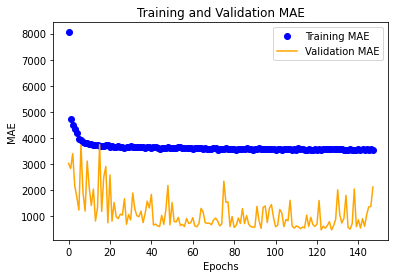

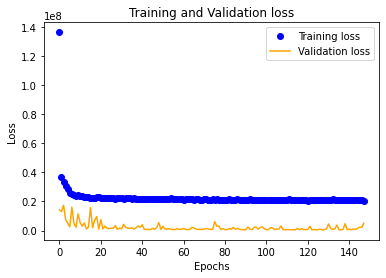

In [ ]:
# plotting the graph to see the training and validation loss by epoch
import matplotlib.pyplot as plt

mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(mae)) #number of epochs
#plotting training and validation MAE
# "bo" is for "blue dot"
plt.plot(epochs, mae, 'bo', label='Training MAE')
# orange is for "solid orange line"
plt.plot(epochs, val_mae, 'orange', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

plt.figure()
#plotting training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


## **Evaluation Metrics**

**RMSE of train dataset**

In [ ]:
# make a prediction for train data
pred_train = model.predict(X_train)


print('Lowest Train MAE: ', mean_absolute_error(y_train, pred_train))
print('Lowest Train MAPE: ', round(mean_absolute_percentage_error(y_train, pred_train)*100,3))

Lowest Train MAE:  472.13564717005124
Lowest Train MAPE:  1.214


**RMSE of validation dataset**

In [ ]:
# make a prediction for validation data
pred_val = model.predict(X_val)

print('Lowest Validation MAE: ', mean_absolute_error(y_val, pred_val))
print('Lowest Validation MAPE: ', round(mean_absolute_percentage_error(y_val, pred_val)*100,3))

Lowest Validation MAE:  468.9315830567332
Lowest Validation MAPE:  1.208


In [ ]:
# make a prediction for test data
pred_test = model.predict(X_test)

print('Lowest test MAE: ', mean_absolute_error(y_test, pred_test))
print('Lowest test MAE: ', round(mean_absolute_percentage_error(y_test, pred_test)*100,3))

Lowest test MAE:  507.1955163686114
Lowest test MAE:  1.188


## Actual vs Predicted 

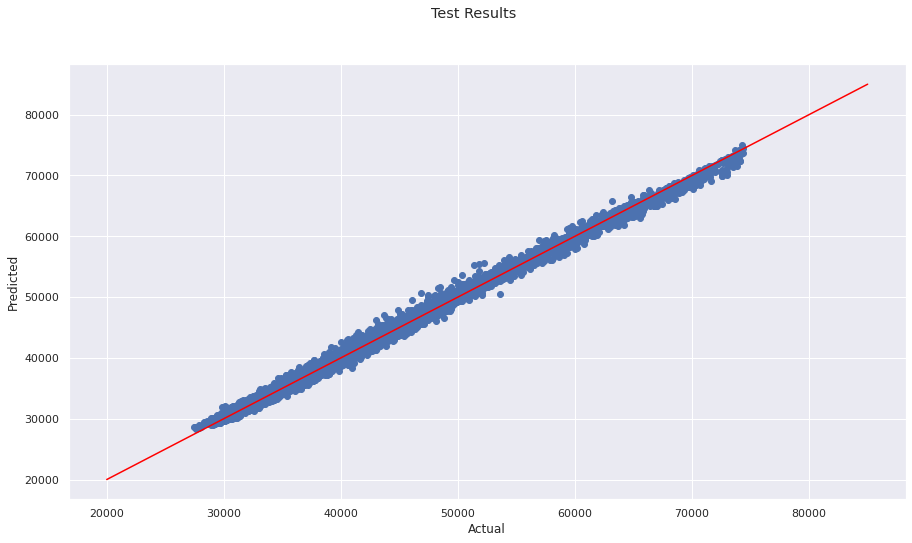

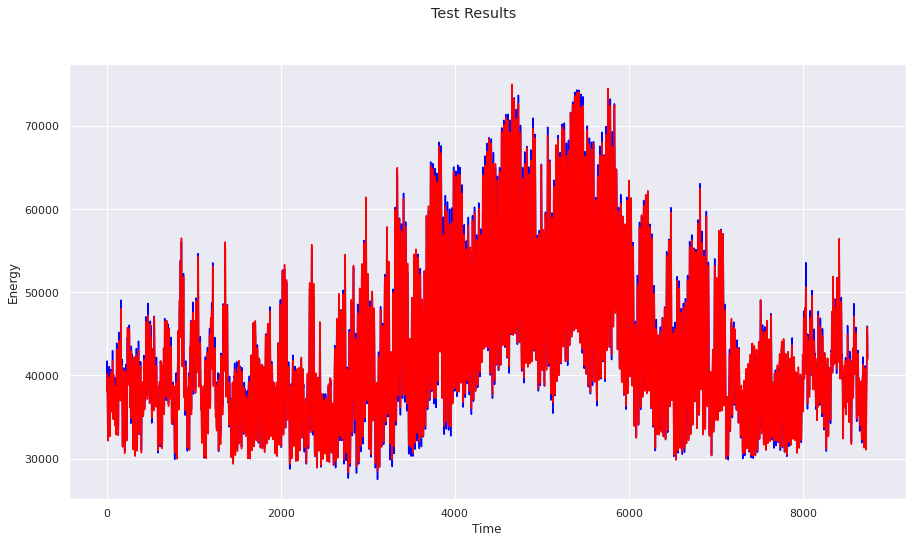

In [ ]:
import matplotlib.pyplot as plt

#plotting the test results, Actuals vs Predicted
actual = y_test # the actual
sns.set(rc={'figure.figsize':(15,8)})
plt.scatter(x=actual, y=pred_test)
x = np.linspace(20000,85000) # 45 degree line from 0 to 25 (axes are the same)
plt.plot(x, x, color='red')
plt.suptitle('Test Results')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
# looks pretty good!

# show timeseries plot on the train and validation data
plt.plot(np.arange(X_test.shape[0]), y_test, color='blue') # actual data
plt.plot(np.arange(X_test.shape[0]), pred_test, color='red') # predicted data
plt.suptitle('Test Results')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.show()

# Pre-trained model

In [ ]:
model = models.load_model('/content/drive/Shareddrives/Deep Learning Team Project/Project 2/Models/model_v1_PC_MAE_507.h5')

# Residual Analysis

Since we have used n_steps 16 we will have the first 15 values missing in the y_test. You can see below that our data will start from **2020-01-01 15:00:00**

In [ ]:
y_test #look at array

array([39905.447776, 39384.852861, 39038.271821, ..., 44785.4356  ,
       43812.739922, 42113.28701 ])

In [ ]:
Residual_Analysis.iloc[14:16,:] #look at specific values

,MWh,dwpf,tmpf,relh,feel,Hour,Day_of_week,Is_Weekend,Day_of_month,Day_of_year,...,tyr_tmpf_max_24,tyr_relh_min_12,tyr_relh_max_12,tyr_relh_min_24,tyr_relh_max_24,tyr_Int_tmpf_dwpf,tyr_Int_tmpf_relh,tyr_Int_tmpf_feel,tyr_Int_relh_feel,tyr_Int_dwpf_feel
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2020-01-01 14:00:00,39905.447776,27.0,60.1,28.13,44.53,14,2,0,1,1,...,55.9,42.48,77.88,19.74,77.88,1640.79,2255.688,2819.61,2255.688,1640.79
2020-01-01 15:00:00,39384.852861,27.0,60.1,28.13,44.53,15,2,0,1,1,...,55.9,42.48,72.93,19.74,77.88,1768.00,2606.240,2704.00,2606.240,1768.00


In [ ]:
# Select only subset of data
Final_Analysis = Residual_Analysis.iloc[14:,:].copy()

# Change index to 0,1,2.. so that we can concat the predicted values
Final_Analysis.reset_index(drop=False,inplace=True)

# Add the predicted column
pred_df=pd.DataFrame(pred_test,columns=['Pred_MWh'])
Final_Analysis['Pred_MWh']=pred_df
Final_Analysis['Error_MWh']=Final_Analysis['MWh'] - Final_Analysis['Pred_MWh']

Final_Analysis.set_index('Unnamed: 0', inplace=True)

## Predicted vs Actual

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


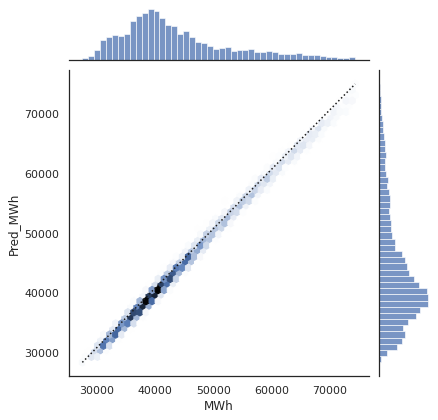

In [ ]:
#plot predicted vs actual
with sns.axes_style('white'):
  g = sns.jointplot("MWh", "Pred_MWh", Final_Analysis, kind='hex')
  g.ax_joint.plot(np.linspace(min(Final_Analysis['MWh']),max(Final_Analysis['MWh'])),
                  np.linspace(min(Final_Analysis['Pred_MWh']),max(Final_Analysis['Pred_MWh'])), ':k')

* From the predicted vs actual plot we see that the points are very close to the line of fit. Given that this is data for the entire year, it is difficult to point a specific timeframe. However, overall, the model performance is good.

## Prediction error by season

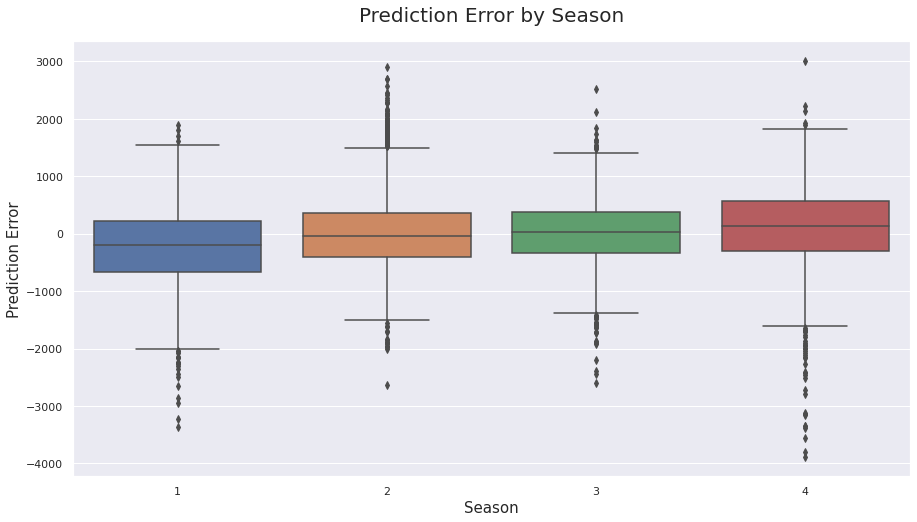

In [ ]:
# plot the boxplot by season 
sns.set(rc={'figure.figsize':(15,8)})
plot_boxplot = sns.boxplot(x= "season", y="Error_MWh", data=Final_Analysis, dodge=False)
plot_boxplot.set_ylabel("Prediction Error", fontsize = 15)
plot_boxplot.set_xlabel("Season", fontsize = 15)
plot_boxplot.set_title("Prediction Error by Season", fontsize = 20, pad = 20)
plt.show()

* The second analysis was to understand the model prediction resutls by season. The seasons are broken down by 3 months, with season 1 as Spring starting from Spring, 2 as Summer, 3 as Fall, and 4 as Winter. From the boxplot, we can see that the predictions for Spring are higher.

* Season 1 - Spring - March, April, May
* Season 2 - Summer - June, July, August
* Season 3 - Fall - September, October, November
* Season 4 - Summer - December, January, February

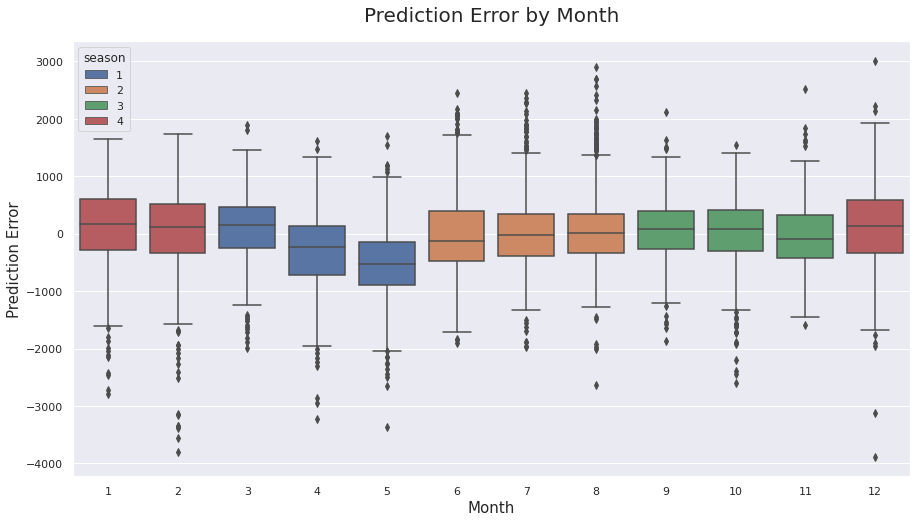

In [ ]:
# plot the boxplot by month and colored by seasons
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15,8)})
plot_boxplot = sns.boxplot(x= "Month", y="Error_MWh", hue = "season", data=Final_Analysis, dodge=False)
plot_boxplot.set_ylabel("Prediction Error", fontsize = 15)
plot_boxplot.set_xlabel("Month", fontsize = 15)
plot_boxplot.set_title("Prediction Error by Month", fontsize = 20, pad = 20)
plt.show()

* In the next plot, the predictions are broken down by month.  March (month 3) has a few outliers. In April and May (months 4 and 5) the model is predicting higher than expected. In 2020, COVID began in March where more people began working from home. The unexpected uptick prediction in energy demand can be attributed to the increased consumption during those months.

## Full year view of Energy Prediction error 

In [ ]:
df1 = Final_Analysis.groupby(['Month', 'Day_of_month'],sort=False).agg({'Error_MWh':['mean']}) #aggregate by day
df1.columns=df1.columns.droplevel(0) #reset index
df1.reset_index(inplace=True)

# pandas pivot with multiple variables
heatmap_data = pd.pivot_table(df1, values='mean', index=['Month'], columns='Day_of_month')
# print to see few rows and columns
print(heatmap_data.iloc[0:3, 0:3])

months=df1.Month.unique().tolist()
heatmap_data=heatmap_data.loc[months]

Day_of_month           1           2           3
Month                                           
1             950.911802  679.748546  642.886994
2             -50.395387  104.852046   -8.446828
3              76.121060  386.587010  494.934068


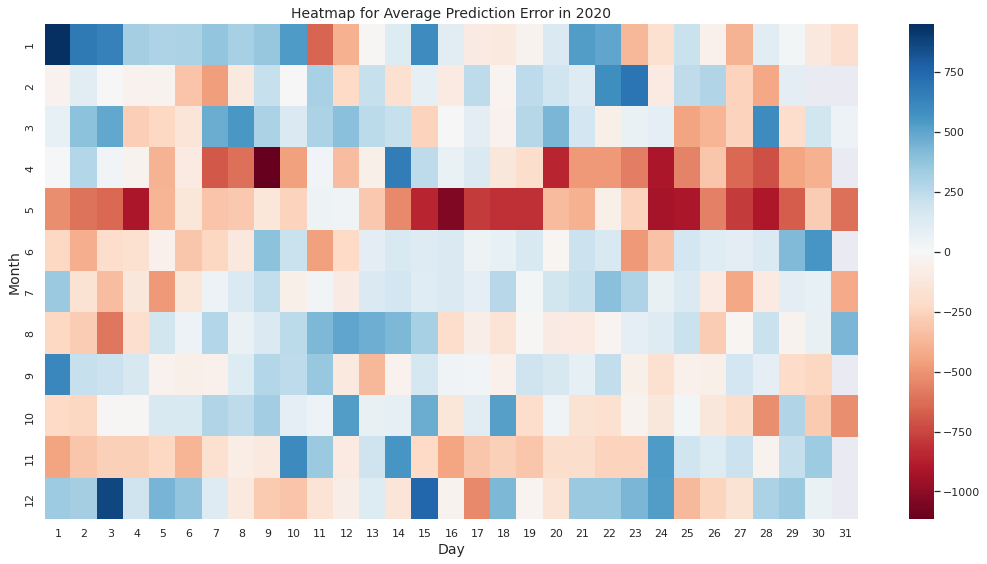

In [ ]:
vcenter = 0 
vmin, vmax = heatmap_data.min().min(), heatmap_data.max().max() #center the color shade
normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)
colormap = cm.RdBu

#plot a daily heatmap by residual and code by color
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(heatmap_data,cmap=colormap,norm=normalize)
plt.xlabel("Day", size=14)
plt.ylabel("Month", size=14)
plt.title("Heatmap for Average Prediction Error in 2020", size=14)
plt.tight_layout()

* The full year heatmap view of energy predictions in the third plot gives a high level summary of the model performance. There is no particular inference that can be made from the days, however, in general, similar to the predicted vs actual graph, the lighter shaded squares show accurate predictions which reflects the model performance.

## Error estimation by hour

In [ ]:
df2 = Final_Analysis.groupby(['Hour'],sort=False).agg({'Error_MWh':['mean']}) #group by hour
df2.columns=df2.columns.droplevel(0) #reset index
df2.reset_index(inplace=True)

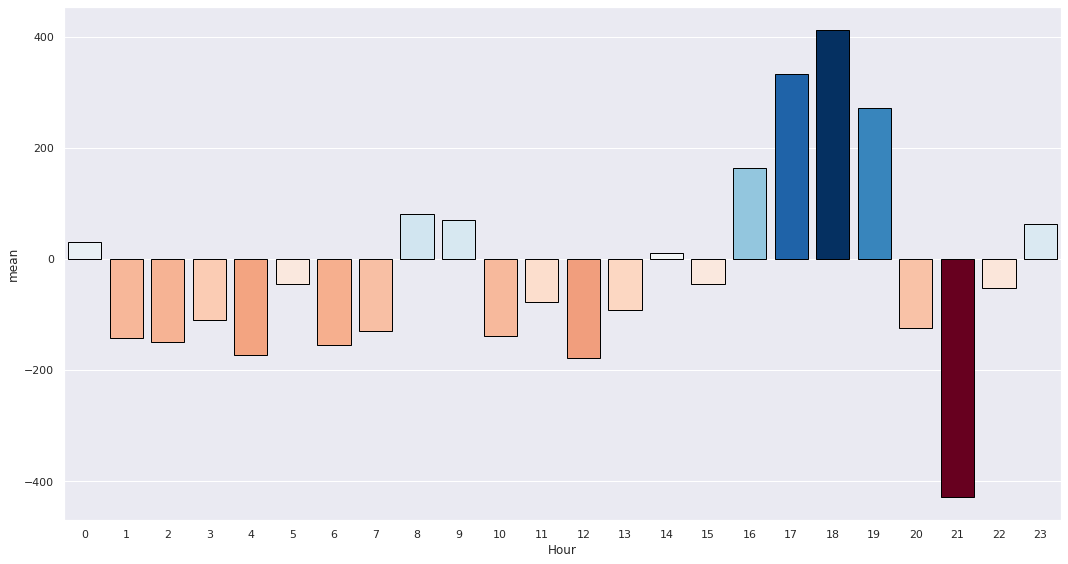

In [ ]:
ax = sns.barplot(x= "Hour", y="mean", data=df2,edgecolor='black') #set axis by hour

heights = np.array( [bar.get_height() for bar in ax.containers[0]]) #create heights
normalize = mcolors.TwoSlopeNorm(vcenter=0,vmin=heights.min(), vmax=heights.max()) #normalize to plot
colormap = cm.RdBu(normalize(heights)) #set color gradient by graph height
for bar, color in zip(ax.containers[0], colormap): #plot all bars
    bar.set_facecolor(color)
plt.tight_layout()
plt.show() #show plot

* The last plot is based on the hourly predictions. The bars are color coded and shaded, similar to the heatmap, depending on if it is over or underpredicting. The blue shade bars are underpredciting and the red shade bars are overpredicting. In general, the model is predicitng less demand for hours 15-19. This could be attributed to the fact that due to the pandemic a lot people were in their houses and did not go outside, resulting in lower predictions. At the same time, businesses were not allowed to operate during late hours in the pandemic, which is why from hours 19-22 we see higher predictions. 
* If we had more time, we would have used a sin or cos of hours as new variables as there seems to be some cyclic nature in the error by hours of a day 

#Conclusion

*   In the model building step, a lot of time was spent on finding the number of steps that gave us the best results. A model with 6 steps had no to little variability. On the other hand, a model with steps beyond 24 had too much variability. The ideal model had 15 steps that captured stability and variability at the same time.

*   From the literature, the models built using RNNs used feature engineering and LSTMs. Even though convolution was present in the layers, the number of layers were limited. Our model leveraged a combination of feature engineering, convolution, and multiple RNNs (LSTM, bidrectional features, and GRU). We used the simple architecture that the literature descried, however, the results were poor. The best model was derived from stacking multiple RNN layers with bidirectionality and convolution.

* Another way our model differentiates from some of the models in the literature is that we did not use social factors. Son and Kim used social factors such as consumer price index to predict demand. However, our model did not use social factors as we believe that would increase bias and overfit the predictions.

* One of the major learnings was getting model results from feature engineering. Before creating new features we explored simple architectures for a baseline understanding. Two features that were created and had a positive impact on the model were months since and years since. Months since was defined as the month number since the first observation by month. Years since was defined as the year number since the first year.


* Another observation from the month over month and sesaons plots was that the model is underpredicting for the winter months. In general, Texas has high temperatures as a state in the Southern region. Since the model has largely weather data, due to majority of the time of having a similar season, the winter months could have varaible results.


* Overall, the model on a daily basis is perfoming well, however, when looking at predicitons by the hour, the model is overpredicting more than underpredicting. We believe that as long as the model is overpredicting that should not be a problem as ERCOT can be prepared for higher consumption. However, if demand is underpredicted that would be an issue for lack of resources and energy.


#References


*   A. Gensler, J. Henze, B. Sick and N. Raabe, "Deep Learning for solar power forecasting — An approach using AutoEncoder and LSTM Neural Networks," 2016 IEEE International Conference on Systems, Man, and Cybernetics (SMC), 2016, pp. 002858-002865, doi: 10.1109/SMC.2016.7844673.

* C. Hor, S. J. Watson and S. Majithia, "Analyzing the impact of weather variables on monthly electricity demand," in IEEE Transactions on Power Systems, vol. 20, no. 4, pp. 2078-2085, Nov. 2005, doi: 10.1109/TPWRS.2005.857397.

* H. Son and C. Kim, "A Deep Learning Approach to Forecasting Monthly Demand for Residential–Sector Electricity", Sustainability, vol. 12, no. 8, p. 3103, 2020. Available: 10.3390/su12083103.

*   N. G. Paterakis, E. Mocanu, M. Gibescu, B. Stappers and W. van Alst, "Deep learning versus traditional machine learning methods for aggregated energy demand prediction," 2017 IEEE PES Innovative Smart Grid Technologies Conference Europe (ISGT-Europe), 2017, pp. 1-6, doi: 10.1109/ISGTEurope.2017.8260289.

* S. Bouktif, A. Fiaz, A. Ouni and M. Serhani, "Optimal Deep Learning LSTM Model for Electric Load Forecasting using Feature Selection and Genetic Algorithm: Comparison with Machine Learning Approaches †", Energies, vol. 11, no. 7, p. 1636, 2018. Available: 10.3390/en11071636.











